# Cycle Data

In [54]:
from IPython import get_ipython
get_ipython().run_line_magic("reset","-f")

from PyPackageJonas import *

delta_t = 0.001

# Data load

In [55]:
sim_prod = pd.read_csv("cycle_production_data.csv")
Xtime = pd.read_csv("Time_data_wo_noise.csv")

OBSERVATIONS = Xtime[["Cycle_BatchID","EventFrameID_Reference","Time_out","L1_WithoutSensorNoise_PV"]]

In [56]:
# Filling times
observations_TIMES = OBSERVATIONS.pivot_table(index = "Cycle_BatchID", columns="EventFrameID_Reference", values="Time_out")

def f_time(x):
    OBSERVATIONS = x
    if x == int(x):
        OBSERVATIONS = int(x)

    if OBSERVATIONS < 0:
        return "D_" + str(int(abs(OBSERVATIONS)))
    else:
        return "X_"+str(OBSERVATIONS)
observations_TIMES.columns = observations_TIMES.columns.map(f_time)

# Make new column T for the total time
ax_sum = observations_TIMES.sum(axis=1)

# Make new columns S_i as sum of delay and duration
for c in np.unique(np.array([int(float(c[2:])) for c in observations_TIMES.columns])):
    lol = observations_TIMES.columns[ [c == int(float(i[2:])) for i in observations_TIMES.columns] ]
    observations_TIMES["S_" + str(c)] = observations_TIMES[lol].sum(axis=1)

observations_TIMES["T"] = ax_sum


def map_names(name):
    if name == "D":
        return "T_delay"
    elif name == "X":
        return "T_production"
    elif name == "S":
        return "T"
    elif name == "T":
        return "T_total"
    else:
        return name

observations_TIMES = observations_TIMES.rename(columns = { f"{j}" : f"{map_names(j[0])}" + f"{j[1:]}" for j in observations_TIMES.columns})



observations_TIMES.columns

Index(['T_delay_10', 'T_delay_9', 'T_delay_8', 'T_delay_7', 'T_delay_6',
       'T_delay_5', 'T_delay_4', 'T_delay_3', 'T_delay_2', 'T_delay_1',
       'T_production_1', 'T_production_2', 'T_production_3.1',
       'T_production_3.2', 'T_production_4.1', 'T_production_4.2',
       'T_production_4.3', 'T_production_5', 'T_production_6',
       'T_production_7', 'T_production_8', 'T_production_9', 'T_production_10',
       'T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7', 'T_8', 'T_9', 'T_10',
       'T_total'],
      dtype='object', name='EventFrameID_Reference')

In [57]:
# Filling levels
observations_MASSES = OBSERVATIONS.pivot_table(index = "Cycle_BatchID", columns="EventFrameID_Reference", values="L1_WithoutSensorNoise_PV")

def f_levels(x):
    OBSERVATIONS = x
    if x == int(x):
        OBSERVATIONS = int(x)

    if OBSERVATIONS < 0:
        return "M_D_" + str(int(abs(OBSERVATIONS)))
    else:
        return "M_X_"+str(OBSERVATIONS)
observations_MASSES.columns = observations_MASSES.columns.map(f_levels)

levels_ax_sum = observations_MASSES.sum(axis=1)

# Make new columns L_S_i as sum of delay and duration
for c in np.unique(np.array([int(float(c[4:])) for c in observations_MASSES.columns])):
    lol = observations_MASSES.columns[ [c == int(float(i[4:])) for i in observations_MASSES.columns] ]
    observations_MASSES["M_S_" + str(c)] = observations_MASSES[lol].sum(axis=1)

observations_MASSES["M_T"] = levels_ax_sum




def map_names(name):
    if name == "M_D":
        return "M_delay"
    elif name == "M_X":
        return "M_production"
    elif name == "M_S":
        return "M"
    elif name == "M_T":
        return "M_total"
    else:
        return name

observations_MASSES = observations_MASSES.rename(columns = { f"{j}" : f"{map_names(j[0:3])}" + f"{j[3:]}" for j in observations_MASSES.columns})




observations_MASSES.columns

Index(['M_delay_10', 'M_delay_9', 'M_delay_8', 'M_delay_7', 'M_delay_6',
       'M_delay_5', 'M_delay_4', 'M_delay_3', 'M_delay_2', 'M_delay_1',
       'M_production_1', 'M_production_2', 'M_production_3.1',
       'M_production_3.2', 'M_production_4.1', 'M_production_4.2',
       'M_production_4.3', 'M_production_5', 'M_production_6',
       'M_production_7', 'M_production_8', 'M_production_9', 'M_production_10',
       'M_1', 'M_2', 'M_3', 'M_4', 'M_5', 'M_6', 'M_7', 'M_8', 'M_9', 'M_10',
       'M_total'],
      dtype='object', name='EventFrameID_Reference')

In [58]:
# Make all observations data-frame
OBSERVATIONS_TRANSFORMED = observations_TIMES.copy()    # Deep copy
OBSERVATIONS_TRANSFORMED = OBSERVATIONS_TRANSFORMED.join(observations_MASSES)



OBSERVATIONS_TRANSFORMED.columns

Index(['T_delay_10', 'T_delay_9', 'T_delay_8', 'T_delay_7', 'T_delay_6',
       'T_delay_5', 'T_delay_4', 'T_delay_3', 'T_delay_2', 'T_delay_1',
       'T_production_1', 'T_production_2', 'T_production_3.1',
       'T_production_3.2', 'T_production_4.1', 'T_production_4.2',
       'T_production_4.3', 'T_production_5', 'T_production_6',
       'T_production_7', 'T_production_8', 'T_production_9', 'T_production_10',
       'T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7', 'T_8', 'T_9', 'T_10',
       'T_total', 'M_delay_10', 'M_delay_9', 'M_delay_8', 'M_delay_7',
       'M_delay_6', 'M_delay_5', 'M_delay_4', 'M_delay_3', 'M_delay_2',
       'M_delay_1', 'M_production_1', 'M_production_2', 'M_production_3.1',
       'M_production_3.2', 'M_production_4.1', 'M_production_4.2',
       'M_production_4.3', 'M_production_5', 'M_production_6',
       'M_production_7', 'M_production_8', 'M_production_9', 'M_production_10',
       'M_1', 'M_2', 'M_3', 'M_4', 'M_5', 'M_6', 'M_7', 'M_8', 'M_9', 'M_10

# Remove constant observations

In [60]:
labels_remove = []

for label in OBSERVATIONS_TRANSFORMED.columns:
    if (np.unique(OBSERVATIONS_TRANSFORMED[label].values).__len__() == 1):
        # print(label)
        labels_remove += [label]


# Removing T_production_8 implies we should also remove either T_8 or T_delay_8$ as they are the sum
labels_remove += ["T_production_4.1" , "T_production_4.3", "T_production_8", "T_8"]

print(labels_remove)


OBSERVATIONS_TRANSFORMED = OBSERVATIONS_TRANSFORMED.drop(columns = labels_remove)

['M_delay_10', 'M_delay_6', 'M_delay_4', 'M_delay_2', 'M_delay_1', 'M_production_4.1']


In [7]:
# convert to data matrix
X = OBSERVATIONS_TRANSFORMED.values.T
[N,n] = X.shape
print(f"N={N}, n={n}")

labels = OBSERVATIONS_TRANSFORMED.columns



# labels

N=58, n=368


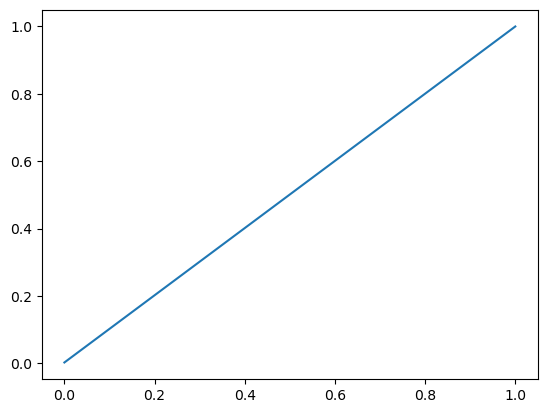

In [8]:
# xx = np.linspace(0,1,OBSERVATIONS_TRANSFORMED["T_production_1"].__len__())
# temp = OBSERVATIONS_TRANSFORMED["T_production_1"] + delta_t * scipy.stats.uniform.rvs(size = OBSERVATIONS_TRANSFORMED["T_production_1"].__len__())
# plt.plot(xx,np.sort(scipy.stats.ecdf(temp).cdf.evaluate(temp)))

In [9]:
# # Prepare Kernels, transformed data to uniform (from kernel), Scott's optimal bandwiths
# # kernels_X = [gaussian_kde(X[i,:]) for i in range(N)]
# h_silv = 0.9 * np.min([ temp.var()**0.5, (np.quantile(temp, 0.75) - np.quantile(temp, 0.25)) / 1.35]) * temp.__len__()**-0.2
# kernel = gaussian_kde(temp, "silverman")

# U = [kernel.integrate_box_1d(-np.inf, x_i) for x_i in temp]

# # U = np.vstack( [np.array([kernels_X[i].integrate_box_1d(-np.inf, x_i) for x_i in X[i,:]]) for i in range(N) ])
# # kernels_U = [gaussian_kde(U[i,:]) for i in range(N)]

# # h = np.array([(kernels_X[i].covariance**0.5)[0,0] for i in range(N)])

In [10]:
x_lin = np.linspace(0,1,501) #; x_lin = (x_lin[1:] + x_lin[:-1]) / 2
y_lin = np.linspace(0,1,501) #; y_lin = (y_lin[1:] + y_lin[:-1]) / 2
xx, yy = np.meshgrid(x_lin, y_lin)

xx_eval = xx.flatten()
yy_eval = yy.flatten()

xxyy_eval = np.array([xx.flatten(), yy.flatten()])


Trapz_weights_2d = np.array([[1] + [2 for i in range(xx.shape[1]-2)] + [1]] + 
                             [[2] + [4 for i in range(xx.shape[1]-2)] + [2] for j in range(xx.shape[0] - 2)] + 
                             [[1] + [2 for i in range(xx.shape[1]-2)] + [1]] )

Trapez_weights_1d_x = np.array([1] + [2 for i in range(xx.shape[0] - 2)] + [1])

Trapez_weights_1d_y = np.array([1] + [2 for i in range(xx.shape[1] - 2)] + [1])

In [42]:
labels_select = labels
G_obs = np.full([labels_select.__len__()]*2, np.nan)
G_obs.shape

# np.save("G_obs_large_MI_labels", labels_select)

(58, 58)

In [43]:
# U = np.array([scipy.stats.ecdf(OBSERVATIONS_TRANSFORMED[label]).cdf.evaluate(OBSERVATIONS_TRANSFORMED[label]) for label in labels])


for idx_1, label_1 in enumerate(labels_select[:-1]):
    X1 = OBSERVATIONS_TRANSFORMED[label_1].values


    # If X is delay, check how many are atoms
    if label_1.startswith("T_delay"):
        b1_isAtom = X1 == 0
    else:
        b1_isAtom = np.array([False for i in range(X1.__len__())])
    
    pAtom_1 = b1_isAtom.mean()

    


    # # split into atom and not atom
    # # Non-atom can actually be anything between value and +delta_t -> add random noise and should be rerun multiple times
    # The non-atom observations are transformed to uniform
    X1_nonAtom = X1[~ b1_isAtom]
    X1_nonAtom = X1_nonAtom + delta_t * scipy.stats.uniform.rvs(size = X1_nonAtom.__len__())
    U1_nonAtom = scipy.stats.ecdf(X1_nonAtom).cdf.evaluate(X1_nonAtom)
    U1_nonAtom = U1_nonAtom - 1 / (2 * U1_nonAtom.__len__())
    X1[~ b1_isAtom] = U1_nonAtom


    # density of X1 where not atom
    fhat_1_kern = KernelJones1D_nonnegative(X1[~b1_isAtom], proper = False)
    fhat_1 = fhat_1_kern(x_lin)
    fhat_1 = fhat_1 / fhat_1.mean() * (1-pAtom_1)
    fhat_1_idxNotNull = fhat_1 > 0
    # # print(f" p_atom = {p1_atom}")

    
    # if label == labels[10]:
    #     plt.hist(U1_nonAtom)

    # --------------------------------------------------------
    # Up to this part is very quick. Simply redo for next loop
    # --------------------------------------------------------

    for idx_2, label_2 in enumerate(labels_select[idx_1+1:]):
        # print(f"processing : ( {label_1} , {label_2} )")



        X2 = OBSERVATIONS_TRANSFORMED[label_2].values

        # If X is delay, check how many are atoms
        if label_2.startswith("T_delay"):
            b2_isAtom = X2 == 0
        else:
            b2_isAtom = np.array([False for i in range(X2.__len__())])

        pAtom_2 = b2_isAtom.mean()

        


        X2_nonAtom = X2[~ b2_isAtom]
        X2_nonAtom = X2_nonAtom + delta_t * scipy.stats.uniform.rvs(size = X2_nonAtom.__len__())
        U2_nonAtom = scipy.stats.ecdf(X2_nonAtom).cdf.evaluate(X2_nonAtom)
        U2_nonAtom = U2_nonAtom - 1 / (2 * U2_nonAtom.__len__())
        X2[~ b2_isAtom] = U2_nonAtom


        # density of X2 when not atom
        fhat_2_kern =  KernelJones1D_nonnegative(X2[~b2_isAtom],proper = False)
        fhat_2 = fhat_2_kern(x_lin)
        fhat_2 = fhat_2 / fhat_2.mean() * (1-pAtom_2)
        fhat_2_idxNotNull = fhat_2 > 0
        

        

        b_1isAtom_2isAtom = ( b1_isAtom)  &  ( b2_isAtom)
        b_1isAtom_2isNot  = ( b1_isAtom)  &  (~b2_isAtom)
        b_1isNot_2isAtom  = (~b1_isAtom)  &  ( b2_isAtom)
        b_1isNot_2isNot   = (~b1_isAtom)  &  (~b2_isAtom)

        

        pAtom_12 = b_1isAtom_2isAtom.mean()
        
        # check if both are atoms
        if b_1isAtom_2isAtom.sum() > 0:
            I_AA = pAtom_12 * np.log(pAtom_12 / (pAtom_1 * pAtom_2))
        else:
            I_AA = 0


        # region where X1 is not an atom but X2 is
        if b_1isNot_2isAtom.sum() > 0:
            # Compute kernel
            fhat_1_given_2_kern = KernelJones1D_nonnegative(X1[b_1isNot_2isAtom], proper = False)
            
            # evaluate kernel and scale to proper mass
            fhat_1_given_2 = fhat_1_given_2_kern(x_lin)
            # print(fhat_1_given_2.mean())
            fhat_1_given_2_mass = pAtom_2 - pAtom_12
            fhat_1_given_2 = fhat_1_given_2 / fhat_1_given_2.mean() * fhat_1_given_2_mass


            fhat_1_given_2_idxNotNull = fhat_1_given_2 > 0
            fhat_1_given_2_nonNull = fhat_1_given_2[fhat_1_given_2_idxNotNull]

            idx_eval = (fhat_1_idxNotNull) & (fhat_1_given_2_idxNotNull > 0)
            
            # Compute part of the sum
            a =   (fhat_1_given_2_nonNull * np.log(fhat_1_given_2_nonNull)).mean()
            b = - (fhat_1_given_2[idx_eval] * np.log(pAtom_2 * fhat_1[idx_eval])).mean()
            I_1A = a + b
            I_1A *= pAtom_2

            # print(I_1A)
        else:
            I_1A = 0

        if (I_1A != I_1A):
            print(f"Error when ( {label_1} , {label_2} ). Got {I_1A}")
            print()


        # region where X1 is an atom but X2 is
        if b_1isAtom_2isNot.sum() > 0:
            # Compute kernel
            fhat_2_given_1_kern = KernelJones1D_nonnegative(X2[b_1isAtom_2isNot], proper = False)
            
            # evaluate kernel and scale to proper mass
            fhat_2_given_1 = fhat_2_given_1_kern(x_lin)
            # print(fhat_1_given_2.mean())
            fhat_2_given_1_mass = pAtom_1 - pAtom_12
            fhat_2_given_1 = fhat_2_given_1 / fhat_2_given_1.mean() * fhat_2_given_1_mass


            fhat_2_given_1_idxNotNull = fhat_2_given_1 > 0
            fhat_2_given_1_nonNull = fhat_2_given_1[fhat_2_given_1_idxNotNull]

            idx_eval = (fhat_2_idxNotNull) & (fhat_2_given_1_idxNotNull)
            
            # Compute part of the sum
            a =   (fhat_2_given_1_nonNull * np.log(fhat_2_given_1_nonNull)).mean()
            b = - (fhat_2_given_1[idx_eval] * np.log(pAtom_1 * fhat_2[idx_eval])).mean()
            I_A2 = a + b
            I_A2 *= pAtom_1
        else:
            I_A2 = 0

        if (I_A2 != I_A2):
            print(f"Error when ( {label_1} , {label_2} ). Got {I_A2}")
            print()



        if b_1isNot_2isNot.sum() > 0:
            kern_centers = np.vstack([X1[b_1isNot_2isNot] , X2[b_1isNot_2isNot] ])
            fhat_12_kern = KernelJones2D_nonnegative_version_Jonas(kern_centers = kern_centers, proper = False)

            fhat_12 = fhat_12_kern(xxyy_eval)
            fhat_12 = np.reshape(fhat_12, xx.shape)
            # print(fhat_12.shape)
            
            fhat_12_mass = 1 - pAtom_1 - pAtom_2 + pAtom_12
            fhat_12 = fhat_12 / fhat_12.mean() * fhat_12_mass

            fhat_12_idxNotNull = fhat_12 > 0
            fhat_12_nonNull = fhat_12[fhat_12_idxNotNull]

            idx_eval = fhat_12_idxNotNull

            # Since meshgrid makes x varying on the second axis, the temp[1] array should be used for X1 and temp[0] for X2
            temp = np.where(idx_eval)

            a =   (fhat_12_nonNull * np.log(fhat_12_nonNull)).mean()
            b = - (fhat_12[idx_eval] * np.log(fhat_2[temp[1]] * fhat_1[temp[0]])).mean()
            I_12 = a + b
        else:
            I_12 = 0

        if (I_12 != I_12):
            print(f"Error when ( {label_1} , {label_2} ). Got {I_12}")
            print()


        # print(I_AA + I_1A + I_A2 + I_12)
        print(f"( {label_1} , {label_2} ) : {I_AA + I_1A + I_A2 + I_12}")
        G_obs[ idx_1, idx_2+idx_1+1 ] = G_obs[ idx_2+idx_1+1, idx_1 ] = I_AA + I_1A + I_A2 + I_12

        # print(f"  ({idx_1},{idx_2 + idx_1 + 1})  {I_AA + I_1A + I_A2}, {G_obs[ idx_1, idx_2+idx_1+1 ]}")


            # print(I11 , b_1isAtom_2isAtom.mean() * np.log(b_1isAtom_2isAtom.mean() / (p1_atom * p2_atom) ) )

        # print(b_1isAtom_2isAtom.mean(), label_1, label_2, b1_isAtom.mean(), b2_isAtom.mean(), b1_isAtom.mean() * b2_isAtom.mean())
        
        # p1_atom = b1_isAtom.mean()
        # print(f" p_atom = {p1_atom}")

        # split into atom and not atom
        # X1_notAtom = X1[~ b1_isAtom]
        # X1_Atom = X1[b1_isAtom]

        # # Non-atom can actually be anything between value and +delta_t -> add random noise and should be rerun multiple times
        # X1_nonAtom = X1_nonAtom + delta_t * scipy.stats.uniform.rvs(size = X1_nonAtom.__len__())

        # U1_nonAtom = scipy.stats.ecdf(X1_nonAtom).cdf.evaluate(X1_nonAtom)
        
        # p2_atom = b2_isAtom.mean()
        # # print(f" p_atom 2 = {p2_atom}")

        # # split into atom and not atom
        # X2_nonAtom = X2[~ b2_isAtom]
        # X2_Atom = X2[b2_isAtom]

        # # Non-atom can actually be anything between value and +delta_t -> add random noise and should be rerun multiple times
        # X2_nonAtom = X2_nonAtom + delta_t * scipy.stats.uniform.rvs(size = X2_nonAtom.__len__())

        # U2_nonAtom = scipy.stats.ecdf(X2_nonAtom).cdf.evaluate(X2_nonAtom)

        # if idx_2 == 1:
        #     plt.hist2d(U1_nonAtom, U2_nonAtom)

    

( T_delay_10 , T_delay_9 ) : 0.011366008824011377
( T_delay_10 , T_delay_8 ) : 0.04672892747575902
( T_delay_10 , T_delay_7 ) : 0.01877335059495923
( T_delay_10 , T_delay_6 ) : 0.04780183364964481
( T_delay_10 , T_delay_5 ) : 0.022438099268764892
( T_delay_10 , T_delay_4 ) : 0.031710935982448354
( T_delay_10 , T_delay_3 ) : 0.01840743139311235
( T_delay_10 , T_delay_2 ) : 0.04130633864028433
( T_delay_10 , T_delay_1 ) : 0.07410547608754445
( T_delay_10 , T_production_1 ) : 0.05977407764626208
( T_delay_10 , T_production_2 ) : 0.08959954319157076
( T_delay_10 , T_production_3.1 ) : 0.020918000336779666
( T_delay_10 , T_production_3.2 ) : 0.028008796077764117
( T_delay_10 , T_production_4.2 ) : 0.055989147527593826
( T_delay_10 , T_production_5 ) : 0.0204884601129647
( T_delay_10 , T_production_6 ) : 0.019878940429559885
( T_delay_10 , T_production_7 ) : 0.06773281619151933
( T_delay_10 , T_production_9 ) : 0.07269304063419585
( T_delay_10 , T_production_10 ) : 0.15818956828835917
( T_de

In [44]:
# np.save("G_obs_large_MI.npy",G_obs)

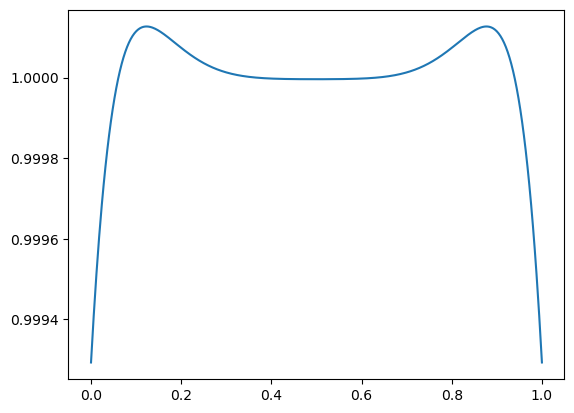

In [41]:
label_1 = "T_delay_10"
label_2 = "T_production_1"





# -----------------------------------------
X1 = OBSERVATIONS_TRANSFORMED[label_1].values
# If X is delay, check how many are atoms
if label_1.startswith("T_delay"):
    b1_isAtom = X1 == 0
else:
    b1_isAtom = np.array([False for i in range(X1.__len__())])

pAtom_1 = b1_isAtom.mean()

# # split into atom and not atom
# # Non-atom can actually be anything between value and +delta_t -> add random noise and should be rerun multiple times
# The non-atom observations are transformed to uniform
X1_nonAtom = X1[~ b1_isAtom]
X1_nonAtom = X1_nonAtom + delta_t * scipy.stats.uniform.rvs(size = X1_nonAtom.__len__())
U1_nonAtom = scipy.stats.ecdf(X1_nonAtom).cdf.evaluate(X1_nonAtom)
U1_nonAtom = U1_nonAtom - 1 / (2 * U1_nonAtom.__len__())
X1[~ b1_isAtom] = U1_nonAtom

# density of X1 where not atom
fhat_1_kern = KernelJones1D_nonnegative(X1[~b1_isAtom], proper = False)
fhat_1 = fhat_1_kern(x_lin)
fhat_1 = fhat_1 / fhat_1.mean() # * (1-pAtom_1)
fhat_1_idxNotNull = fhat_1 > 0







# -----------------------------------------
X2 = OBSERVATIONS_TRANSFORMED[label_2].values

# If X is delay, check how many are atoms
if label_2.startswith("T_delay"):
    b2_isAtom = X2 == 0
else:
    b2_isAtom = np.array([False for i in range(X2.__len__())])

pAtom_2 = b2_isAtom.mean()

X2_nonAtom = X2[~ b2_isAtom]
X2_nonAtom = X2_nonAtom + delta_t * scipy.stats.uniform.rvs(size = X2_nonAtom.__len__())
U2_nonAtom = scipy.stats.ecdf(X2_nonAtom).cdf.evaluate(X2_nonAtom)
U2_nonAtom = U2_nonAtom - 1 / (2 * U2_nonAtom.__len__())
X2[~ b2_isAtom] = U2_nonAtom

# density of X2 when not atom
fhat_2_kern =  KernelJones1D_nonnegative(X2[~b2_isAtom],proper = False)
fhat_2 = fhat_2_kern(x_lin)
fhat_2 = fhat_2 / fhat_2.mean() * (1-pAtom_2)
fhat_2_idxNotNull = fhat_2 > 0





# plt.scatter(X1,X2)

plt.plot(x_lin, fhat_1)

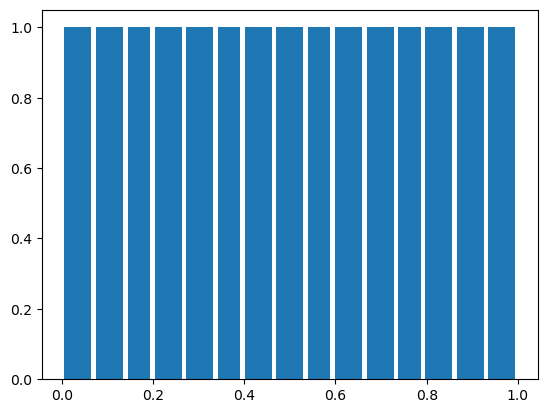

In [37]:
plt.hist(U1_nonAtom,bins = 100);

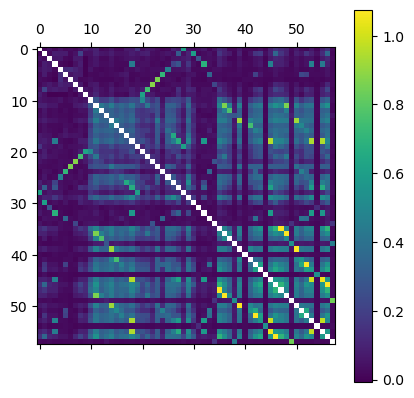

In [45]:
plt.matshow(G_obs)
plt.colorbar()

In [47]:
G_obs[G_obs == G_obs].min()

-0.006216818528403358

In [48]:
G_obs

array([[       nan, 0.01136601, 0.04672893, ..., 0.08928114, 0.14394283,
        0.02298312],
       [0.01136601,        nan, 0.02677827, ..., 0.12503003, 0.35352774,
        0.01481555],
       [0.04672893, 0.02677827,        nan, ..., 0.06771373, 0.10950716,
        0.01991449],
       ...,
       [0.08928114, 0.12503003, 0.06771373, ...,        nan, 0.57021761,
        0.01261121],
       [0.14394283, 0.35352774, 0.10950716, ..., 0.57021761,        nan,
        0.01613251],
       [0.02298312, 0.01481555, 0.01991449, ..., 0.01261121, 0.01613251,
               nan]])

In [53]:
labels_select

Index(['T_delay_10', 'T_delay_9', 'T_delay_8', 'T_delay_7', 'T_delay_6',
       'T_delay_5', 'T_delay_4', 'T_delay_3', 'T_delay_2', 'T_delay_1',
       'T_production_1', 'T_production_2', 'T_production_3.1',
       'T_production_3.2', 'T_production_4.2', 'T_production_5',
       'T_production_6', 'T_production_7', 'T_production_9', 'T_production_10',
       'T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7', 'T_9', 'T_10',
       'T_total', 'M_delay_9'],
      dtype='object', name='EventFrameID_Reference')

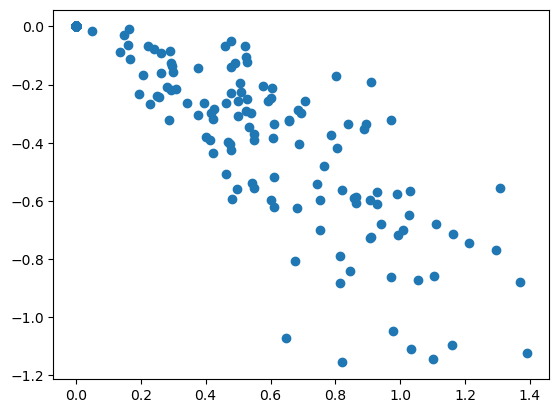

In [24]:
p12 = np.array([[0.25,0.5],
                [0.1, 0.15]])

# p12 = np.array([[0.02, 0.08],
#                 [0.18, 0.72]])


p1 = p12.sum(axis = 1)
p2 = p12.sum(axis = 0)


I = 0
for i in range(2):
    for j in range(2):
        I += p12[i,j] * np.log(p12[i,j] / p1[i] / p2[j])

I



0.0018080960612087103

In [238]:
b_1isAtom_2isNot

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [217]:
X1[b1_isAtom]

array([], dtype=float64)

In [193]:
labels[:31]

Index(['T_delay_10', 'T_delay_9', 'T_delay_8', 'T_delay_7', 'T_delay_6',
       'T_delay_5', 'T_delay_4', 'T_delay_3', 'T_delay_2', 'T_delay_1',
       'T_production_1', 'T_production_2', 'T_production_3.1',
       'T_production_3.2', 'T_production_4.2', 'T_production_5',
       'T_production_6', 'T_production_7', 'T_production_9', 'T_production_10',
       'T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7', 'T_8', 'T_9', 'T_10',
       'T_total'],
      dtype='object', name='EventFrameID_Reference')

In [184]:
U.shape

(59, 368)

In [190]:
labels[10]

'T_production_1'

(array([39., 31., 29., 36., 44., 41., 38., 37., 36., 37.]),
 array([0.01086957, 0.10978261, 0.20869565, 0.3076087 , 0.40652174,
        0.50543478, 0.60434783, 0.70326087, 0.80217391, 0.90108696,
        1.        ]),
 <BarContainer object of 10 artists>)

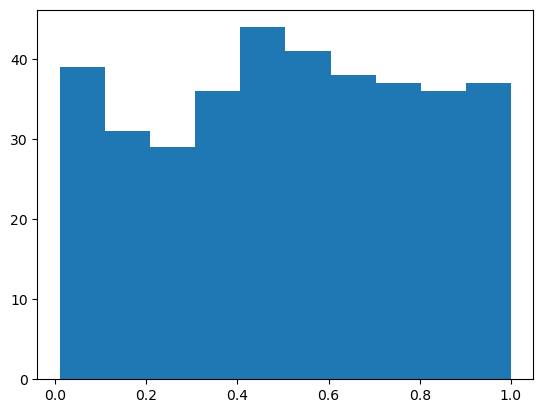

In [189]:
plt.hist(U[10])

In [138]:
OBSERVATIONS_TRANSFORMED["T_production_1"]

Cycle_BatchID
A_1     0.051
A_10    0.051
A_11    0.036
A_12    0.051
A_13    0.052
        ...  
F_61    0.026
F_62    0.051
F_7     0.184
F_8     0.187
F_9     0.061
Name: T_production_1, Length: 368, dtype: float64

In [141]:
delta_t = 0.001

(array([  6.,   0.,   0.,   0.,   1.,   0.,   0.,   6.,   2.,   2.,   5.,
          0.,  25., 122.,  33.,   1.,   0.,   3.,   2.,   3.,   0.,   1.,
          3.,   2.,   2.,   6.,   4.,   3.,   5.,   4.,   7.,   8.,   1.,
          4.,   5.,   6.,   5.,   7.,   5.,   3.,   3.,   3.,   2.,   7.,
          6.,   5.,   1.,   3.,   3.,   2.,   3.,   1.,   2.,   4.,   2.,
          2.,   1.,   3.,   2.,   1.,   1.,   2.,   1.,   2.,   2.,   1.,
          1.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.01510732, 0.01785358, 0.02059985, 0.02334611, 0.02609237,
        0.02883863, 0.03158489, 0.03433116, 0.03707742, 0.03982368,
        0.04256994, 0.04531621, 0.04806247, 0.05080873, 0.05355499,
        0.05630126, 0.05904752, 0.06179378, 0.06454004, 0.0672863 ,
        0.07003257, 0.07277883, 0.07552509, 0.

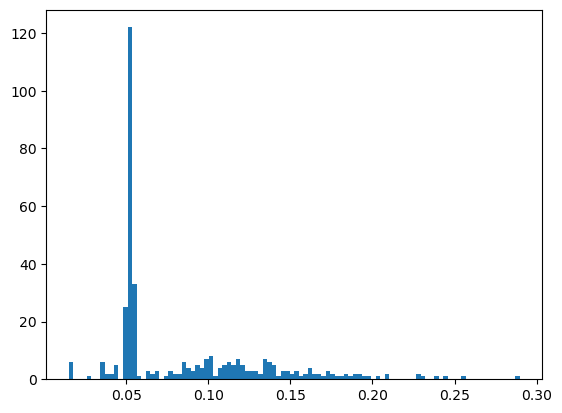

In [143]:
plt.hist(OBSERVATIONS_TRANSFORMED["T_production_1"] + delta_t * scipy.stats.uniform.rvs(size = OBSERVATIONS_TRANSFORMED["T_production_1"].__len__()), 100)



In [153]:
labels_time = labels[:31]
labels_time

# for label in labels_time:
#     plt.figure()
#     plt.hist(OBSERVATIONS_TRANSFORMED[label], 50)
#     plt.title(label)
#     plt.show()
    

Index(['T_delay_10', 'T_delay_9', 'T_delay_8', 'T_delay_7', 'T_delay_6',
       'T_delay_5', 'T_delay_4', 'T_delay_3', 'T_delay_2', 'T_delay_1',
       'T_production_1', 'T_production_2', 'T_production_3.1',
       'T_production_3.2', 'T_production_4.2', 'T_production_5',
       'T_production_6', 'T_production_7', 'T_production_9', 'T_production_10',
       'T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7', 'T_8', 'T_9', 'T_10',
       'T_total'],
      dtype='object', name='EventFrameID_Reference')

'M_production_4.3'

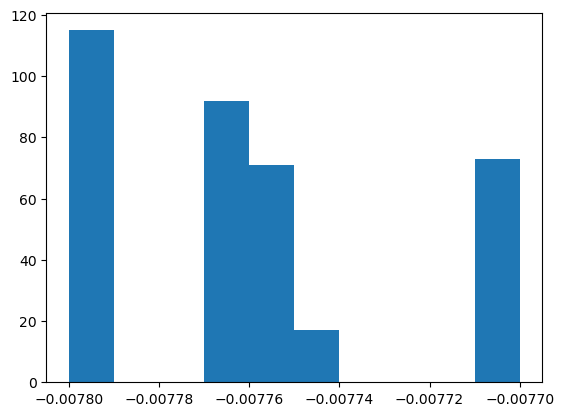

In [67]:
plt.hist(X[44,:])
labels[44]

In [84]:
np.unique(OBSERVATIONS_TRANSFORMED["M_production_4.3"][OBSERVATIONS_TRANSFORMED["M_production_4.3"].index.map(lambda x : x[0]) == "F"])

array([-0.00776, -0.00776, -0.00776, -0.00776, -0.00775, -0.00775])

In [95]:
for i in range(X.shape[0]):
    # print(np.unique(X[i,:]).__len__())
    if np.unique(X[i,:]).__len__() < 100:
        print(labels[i])

T_delay_10
T_production_2
T_production_4.2
M_delay_3
M_production_4.3


(array([ 16.,   0.,   0.,   0.,  10.,   1.,   6.,  11., 274.,  50.]),
 array([0.024 , 0.0312, 0.0384, 0.0456, 0.0528, 0.06  , 0.0672, 0.0744,
        0.0816, 0.0888, 0.096 ]),
 <BarContainer object of 10 artists>)

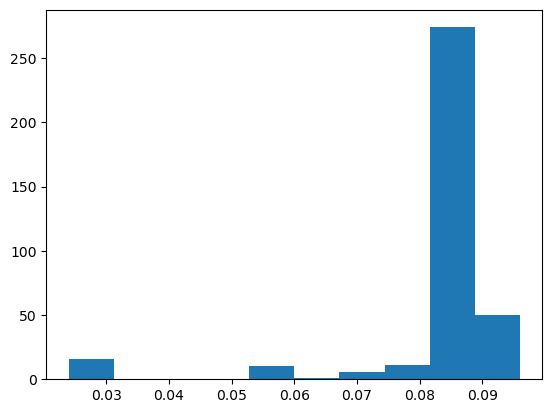

In [106]:
plt.hist(OBSERVATIONS_TRANSFORMED["T_production_4.2"])

In [103]:
(OBSERVATIONS_TRANSFORMED["T_delay_10"].values == 0).sum()

282

In [105]:
np.unique(OBSERVATIONS_TRANSFORMED["T_production_4.2"])

array([0.024, 0.025, 0.025, 0.025, 0.026, 0.055, 0.057, 0.058, 0.058,
       0.059, 0.059, 0.06 , 0.062, 0.069, 0.07 , 0.071, 0.071, 0.072,
       0.08 , 0.08 , 0.08 , 0.081, 0.081, 0.082, 0.082, 0.082, 0.082,
       0.082, 0.082, 0.083, 0.083, 0.083, 0.083, 0.083, 0.084, 0.084,
       0.084, 0.084, 0.084, 0.084, 0.084, 0.085, 0.085, 0.085, 0.085,
       0.085, 0.085, 0.085, 0.085, 0.086, 0.086, 0.086, 0.086, 0.086,
       0.086, 0.087, 0.087, 0.087, 0.087, 0.087, 0.087, 0.087, 0.088,
       0.088, 0.088, 0.088, 0.088, 0.089, 0.089, 0.089, 0.089, 0.09 ,
       0.09 , 0.09 , 0.09 , 0.091, 0.091, 0.091, 0.091, 0.091, 0.092,
       0.092, 0.092, 0.093, 0.093, 0.094, 0.094, 0.094, 0.096])

In [57]:
X.shape

(62, 368)

In [108]:
labels[:31]

Index(['T_delay_10', 'T_delay_9', 'T_delay_8', 'T_delay_7', 'T_delay_6',
       'T_delay_5', 'T_delay_4', 'T_delay_3', 'T_delay_2', 'T_delay_1',
       'T_production_1', 'T_production_2', 'T_production_3.1',
       'T_production_3.2', 'T_production_4.2', 'T_production_5',
       'T_production_6', 'T_production_7', 'T_production_9', 'T_production_10',
       'T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7', 'T_8', 'T_9', 'T_10',
       'T_total'],
      dtype='object', name='EventFrameID_Reference')

In [58]:
X = X[:34,:]
labels = labels[:34]

[N,n] = X.shape

In [59]:
labels

Index(['T_delay_10', 'T_delay_9', 'T_delay_8', 'T_delay_7', 'T_delay_6',
       'T_delay_5', 'T_delay_4', 'T_delay_3', 'T_delay_2', 'T_delay_1',
       'T_production_1', 'T_production_2', 'T_production_3.1',
       'T_production_3.2', 'T_production_4.1', 'T_production_4.2',
       'T_production_4.3', 'T_production_5', 'T_production_6',
       'T_production_7', 'T_production_8', 'T_production_9', 'T_production_10',
       'T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7', 'T_8', 'T_9', 'T_10',
       'T_total'],
      dtype='object', name='EventFrameID_Reference')

In [ ]:
# Prepare Kernels, transformed data to uniform (from kernel), Scott's optimal bandwiths
kernels_X = [gaussian_kde(X[i,:]) for i in range(N)]

U = np.vstack( [np.array([kernels_X[i].integrate_box_1d(-np.inf, x_i) for x_i in X[i,:]]) for i in range(N) ])
kernels_U = [gaussian_kde(U[i,:]) for i in range(N)]

h = np.array([(kernels_X[i].covariance**0.5)[0,0] for i in range(N)])

In [ ]:
U.shape

(34, 368)

(array([282.,   0.,   0.,   0.,   1.,   4.,  12.,  24.,  21.,  24.]),
 array([0.38416928, 0.44561187, 0.50705445, 0.56849704, 0.62993963,
        0.69138221, 0.7528248 , 0.81426738, 0.87570997, 0.93715256,
        0.99859514]),
 <BarContainer object of 10 artists>)

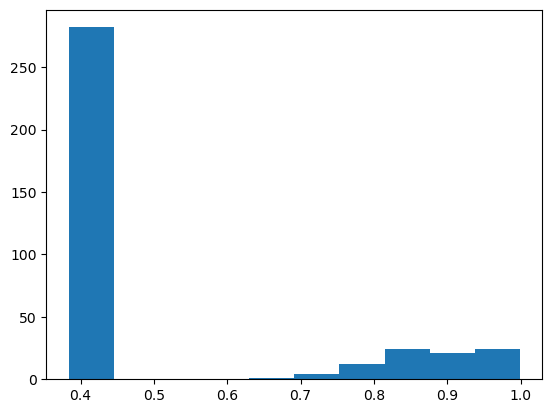

In [ ]:
plt.hist(U[0,:])

# Causal discovery section

In [28]:
# troublesome (nan) resulting idx pairs
idx_tro = [
    {2,30},
    {6,26},
    {7,25},
    {8,24}
    ]



In [29]:
# # N = 10
# n = 200 # number of random samples

# m1 = np.random.normal(loc = 8,size=n)
# m2 = np.random.normal(size=n)
# m3 = m1+m2
# m4 = m1 - m2
# # m3 = (m3-m3.mean()) / m3.std()
# X = np.vstack([ m1, m2, m3, m4 ])

# N = X.shape[0]


# Article "Network deconvolution as a general method to distinguish direct dependencies in networks" use zero in diagonal, "Nonparametric‑copula‑entropy and network deconvolution method for causal discovery in complex manufacturing systems" uses 1 in diagonal
G = np.zeros((N,N))

count = 0

for i in range(N-1):
    kernel_i = kernels_U[i]
    # h_i = h[i]
    u_i = U[i,:]
    for j in range(i+1, N):
        count += 1
        print(f"{ count } / { (N*(N-1)/2) :3.0f}    [{100*count/ (N*(N-1)/2) :7.2f}%]    ({i}, {j})\033[K", end ="\r")

        if not ({i,j} in idx_tro):
        


            # Calculate density
            # Gaussian kernel w. scott's rule (as in paper)
            # kernel_j = kernels[j]
            # h_j = h[j]
            u_j = U[j,:]

            kernel_ij = gaussian_kde(np.vstack([u_i,u_j]))

            # func = c * np.log(c)
            # def c(u_i_var, u_j_var):
            #     x = kernel_ij.pdf([u_i_var,u_j_var])[0]
            #     return x * np.log(x)
            #     u_i_rel = (u_i_var - u_i) / h_i
            #     u_j_rel = (u_j_var - u_j) / h_j

            #     a0_i = 
            #     a0_j = 
            #     p_u_i = (a2_i - a1_i*x_i)*k_i / (a0_i*a2_i-a1_i**2)
            #     p_u_j = (a2_j - a1_j*x_j)*k_j / (a0_j*a2_j-a1_j**2)
            #     c = 1/(n*h_i*h_j) * np.sum(p_u_i,p_u_j)
            #     return c*np.log(c)


            # real implementation should be with boundary correction. Initially just a simple 2D KDE

            # scipy.integrate.dblquad(func, 0,1, 0,1)
            # Calculate copula
            # np.log()

            # Update G matrix
            # G[i,j] = G[j,i] = int 1/(h_j*h_i*n)  0..1, 0..1

            d_vol = kernel_ij.integrate_box(
                    low_bounds = [0,0],
                    high_bounds = [1,1]
                )
            # Simple normalization of KDE such that integrates to 1 (no jackknifing)
            G[i,j] = G[j,i] = \
                scipy.integrate.dblquad(
                    lambda x,y : 
                        kernel_ij.pdf(np.vstack([x,y])) * \
                        kernel_ij.logpdf(np.vstack([x,y])),
                    0,1,
                    0,1
                )[0] / d_vol - np.log(d_vol)

        
        # If in trouble set (very linear behaviour), estimate as average of entropies instead (for 2-30 this is actually true as differences vary between +-5 order e-13)
        else:
            kernel_j = kernels_U[j]
            # h_j = h[j]
            # u_j = U[j,:]
            
            # kernel i
            vol_i = kernel_i.integrate_box_1d(0,1)
            I_i = scipy.integrate.quad(
                lambda u: kernel_i.pdf(u)*kernel_i.logpdf(u), 0,1
                )[0] / vol_i - np.log(vol_i)

            # kernel j
            vol_j = kernel_j.integrate_box_1d(0,1)
            I_j = scipy.integrate.quad(
                lambda u: kernel_j.pdf(u)*kernel_j.logpdf(u), 0,1
                )[0] / vol_j - np.log(vol_j)

            G[i,j] = G[j,i] = (I_i + I_j) / 2
            # print(scipy.integrate.quad(lambda x: kernel_i.pdf(x)*kernel_i.logpdf(x), 0,1)[0] / scipy.integrate.quad(lambda x: kernel_i.pdf(x), 0,1)[0])

            # print(scipy.integrate.quad(lambda x: kernel_j.pdf(x)*kernel_j.logpdf(x), 0,1)[0] / scipy.integrate.quad(lambda x: kernel_j.pdf(x), 0,1)[0])


In [320]:
G.max()

1.739650070084554

In [321]:
np.where(G!= G)[0]

array([], dtype=int64)

In [322]:
np.unique([labels[min(i,j)] + " - " + labels[max(i,j)] for i,j in zip(np.where(G!= G)[0],np.where(G!= G)[1])])

array([], dtype=float64)

In [224]:
np.unique([ str(min(i,j)) + " - " + str(max(i,j)) for i,j in zip(np.where(G!= G)[0],np.where(G!= G)[1])])

array(['2 - 30', '6 - 26', '7 - 25', '8 - 24'], dtype='<U6')

# Undersøgelse af fejlede/nan entries i G

In [336]:
X_skip = ["X_4.1", "X_4.3", "X_8"]

idx_D = list(np.where([l[0] == "D" for l in labels])[0])
idx_S = list(np.where([l[0] == "S" for l in labels])[0])
idx_X = list(np.where([l[0] == "X" for l in labels])[0])

idx_X_skip = list(np.where([X_skip.__contains__(l) for l in labels])[0])


idx_X = list( set(idx_X) - set(idx_X_skip) )

In [319]:
G.shape

(34, 34)

In [337]:
idx_select = idx_X

G_select = G[idx_select,:][:,idx_select]
labels_select = labels[idx_select]

X_select = X[idx_select,:]
U_select = U[idx_select,:]


In [325]:
G_dir = ND(G_select.copy(), alpha=0.3, beta=0.99)
G_dir.shape

(10, 10)

In [327]:
alpha = 0.3
q = np.quantile(G_select[np.triu_indices(G_select.shape[0])], 1-alpha)

G_q = G_select.copy()
G_q[G_q < q] = 0

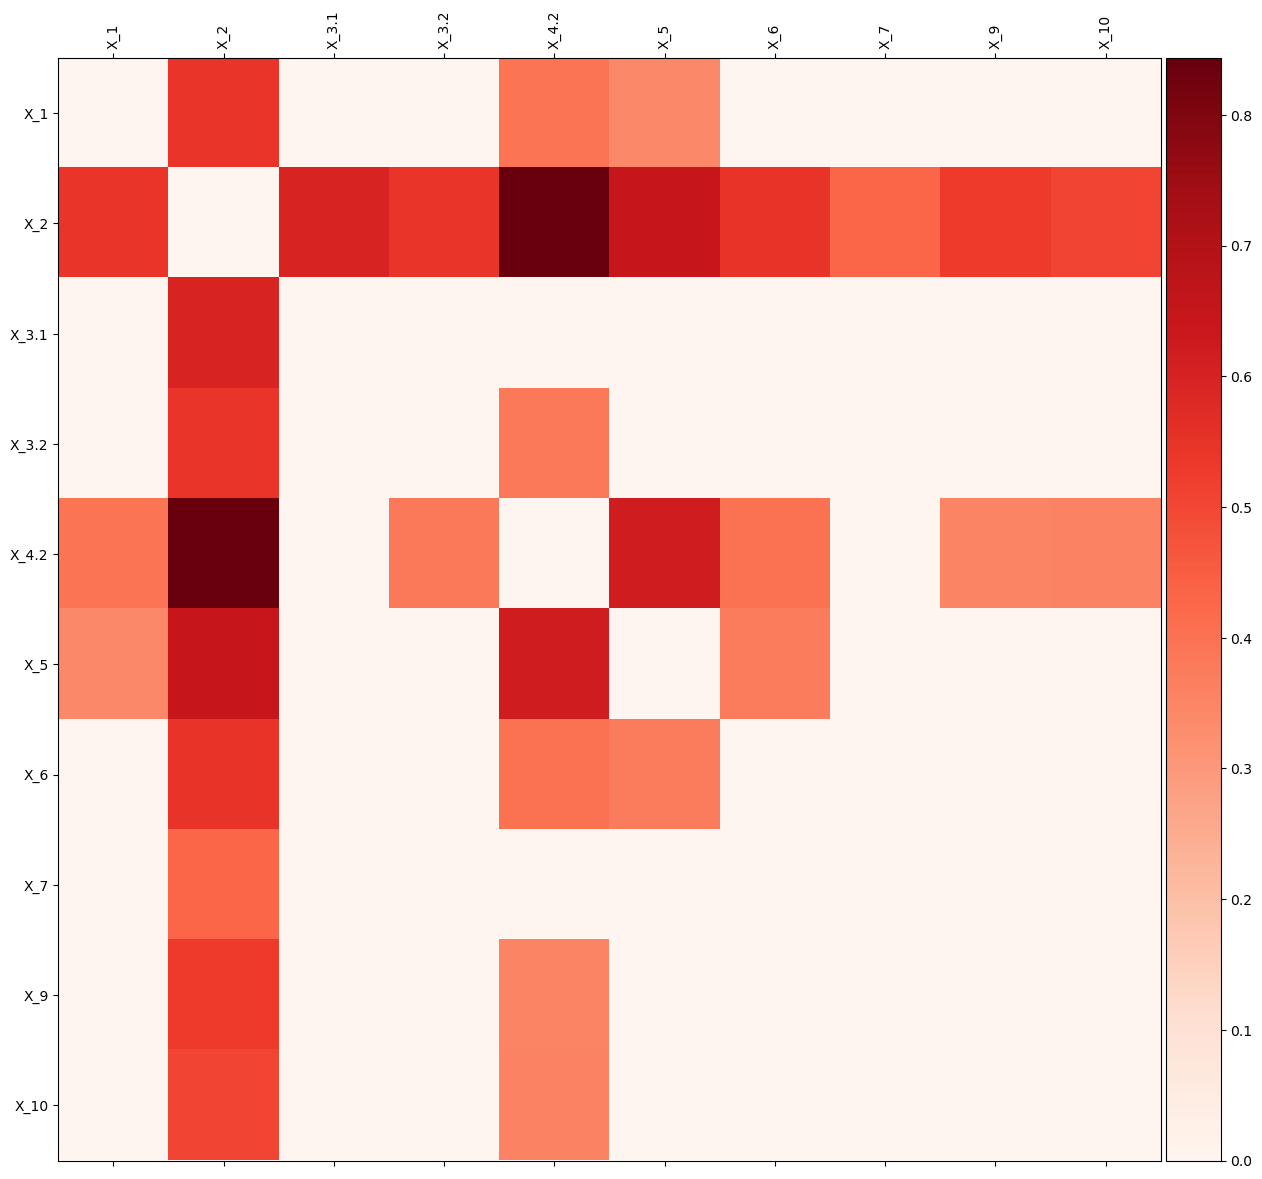

In [299]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
r = ax.matshow(G_q, cmap = "Reds", vmin=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(r, cax=cax)

ax.set_xticks([x for x in range(labels_select.__len__())], labels_select, rotation='vertical');
ax.set_yticks([x for x in range(labels_select.__len__())], labels_select);

In [328]:
eg = np.linalg.eig(G_q)
# (G_dir - eg.eigenvectors @ np.diag(eg.eigenvalues / (1 + eg.eigenvalues)) @ eg.eigenvectors.T).min()
eg.eigenvalues

array([ 2.38080971e+00+0.00000000e+00j, -1.45952023e+00+0.00000000e+00j,
       -8.55949406e-01+0.00000000e+00j, -4.94129299e-01+0.00000000e+00j,
        3.07261367e-01+0.00000000e+00j,  1.21527859e-01+0.00000000e+00j,
        2.73662263e-17+3.90731855e-17j,  2.73662263e-17-3.90731855e-17j,
       -1.73728395e-18+0.00000000e+00j,  6.34782212e-18+0.00000000e+00j])

In [333]:
# G_q
eg = np.linalg.eig(G_q)
G_dir = eg.eigenvectors @ np.diag(eg.eigenvalues / (2 + eg.eigenvalues)) @ eg.eigenvectors.T


In [296]:

# eg = np.linalg.eig(G_dir)
eg = np.linalg.eig(G_q)
beta = 0.99

D = np.real(eg.eigenvalues)
V = np.real(eg.eigenvectors)

lam_n=np.abs( np.min( [D.min(), 0]))
lam_p=np.abs( np.max( [D.max(), 0]))

m1=lam_p*(1-beta)/beta
m2=lam_n*(1+beta)/beta

m = np.max( [m1,m2] )
# m = 2

D = D / (m + D)

In [297]:
mat_new1 = V @ np.diag(D) @ V.T

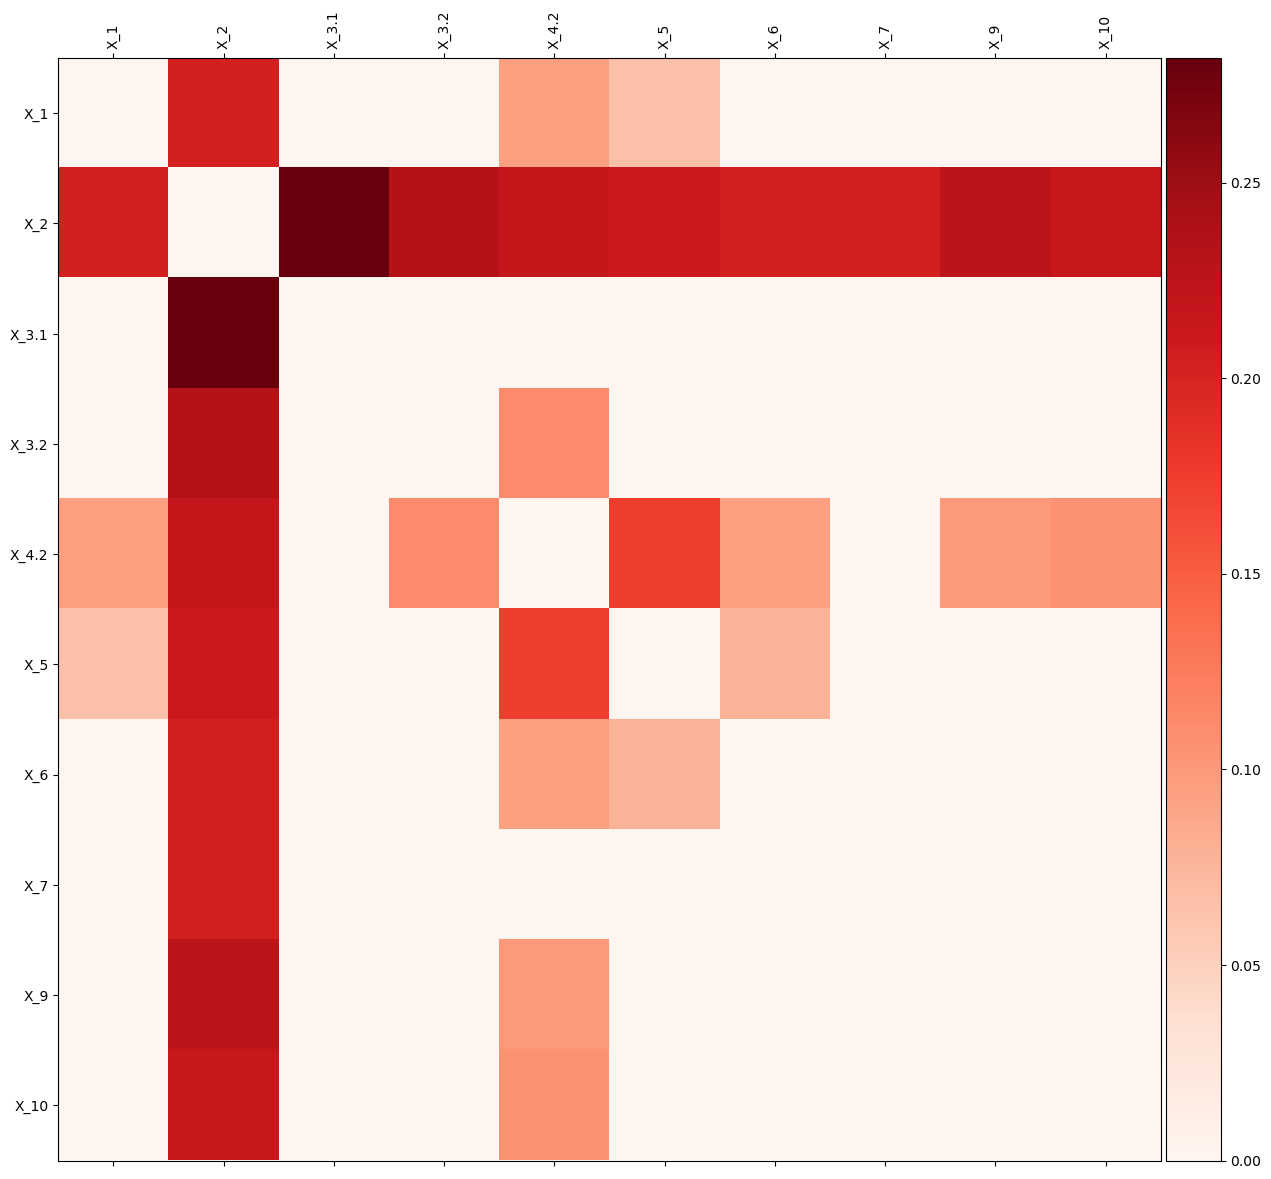

In [298]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
r = ax.matshow(mat_new1, cmap = "Reds", vmin=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(r, cax=cax)

ax.set_xticks([x for x in range(labels_select.__len__())], labels_select, rotation='vertical');
ax.set_yticks([x for x in range(labels_select.__len__())], labels_select);

In [277]:
ind_edges = (G_q>0) * 1.0
ind_nonedges = (G_q==0) * 1.0
m1 = (G_select*ind_nonedges).max()
m2 = (mat_new1).min()
mat_new2 = (mat_new1 + np.max([m1-m2,0]))*ind_edges+(G_select*ind_nonedges)

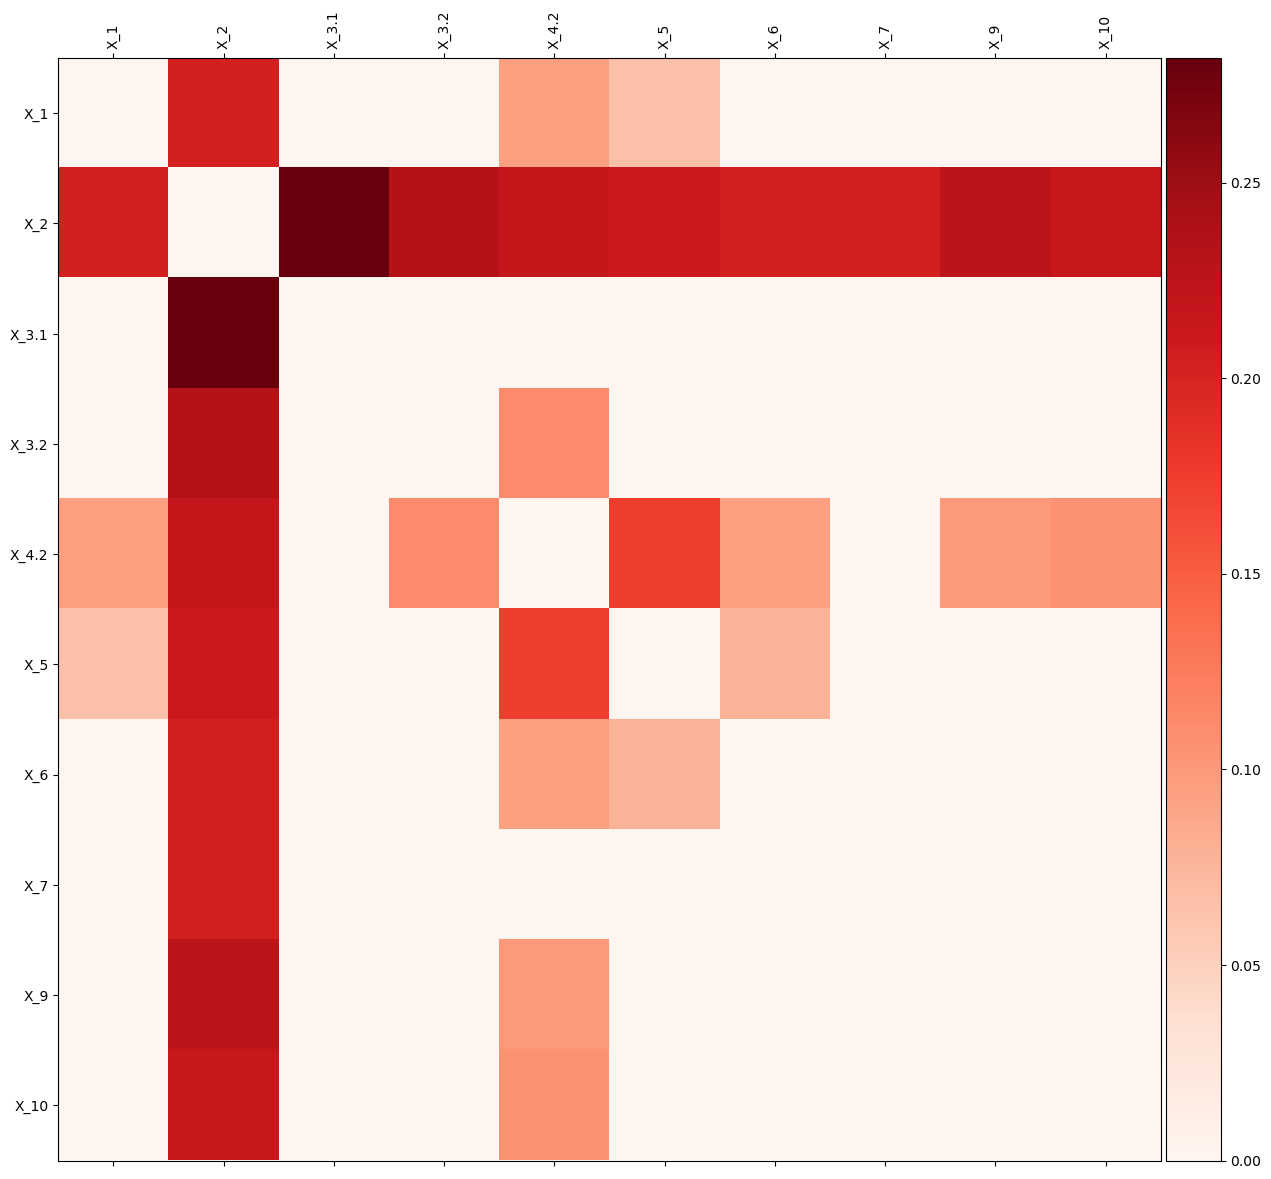

In [326]:
# from ND algo.
fig, ax = plt.subplots(1,1,figsize=(15,15))
r = ax.matshow(G_dir, cmap = "Reds", vmin=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(r, cax=cax)

ax.set_xticks([x for x in range(labels_select.__len__())], labels_select, rotation='vertical');
ax.set_yticks([x for x in range(labels_select.__len__())], labels_select);

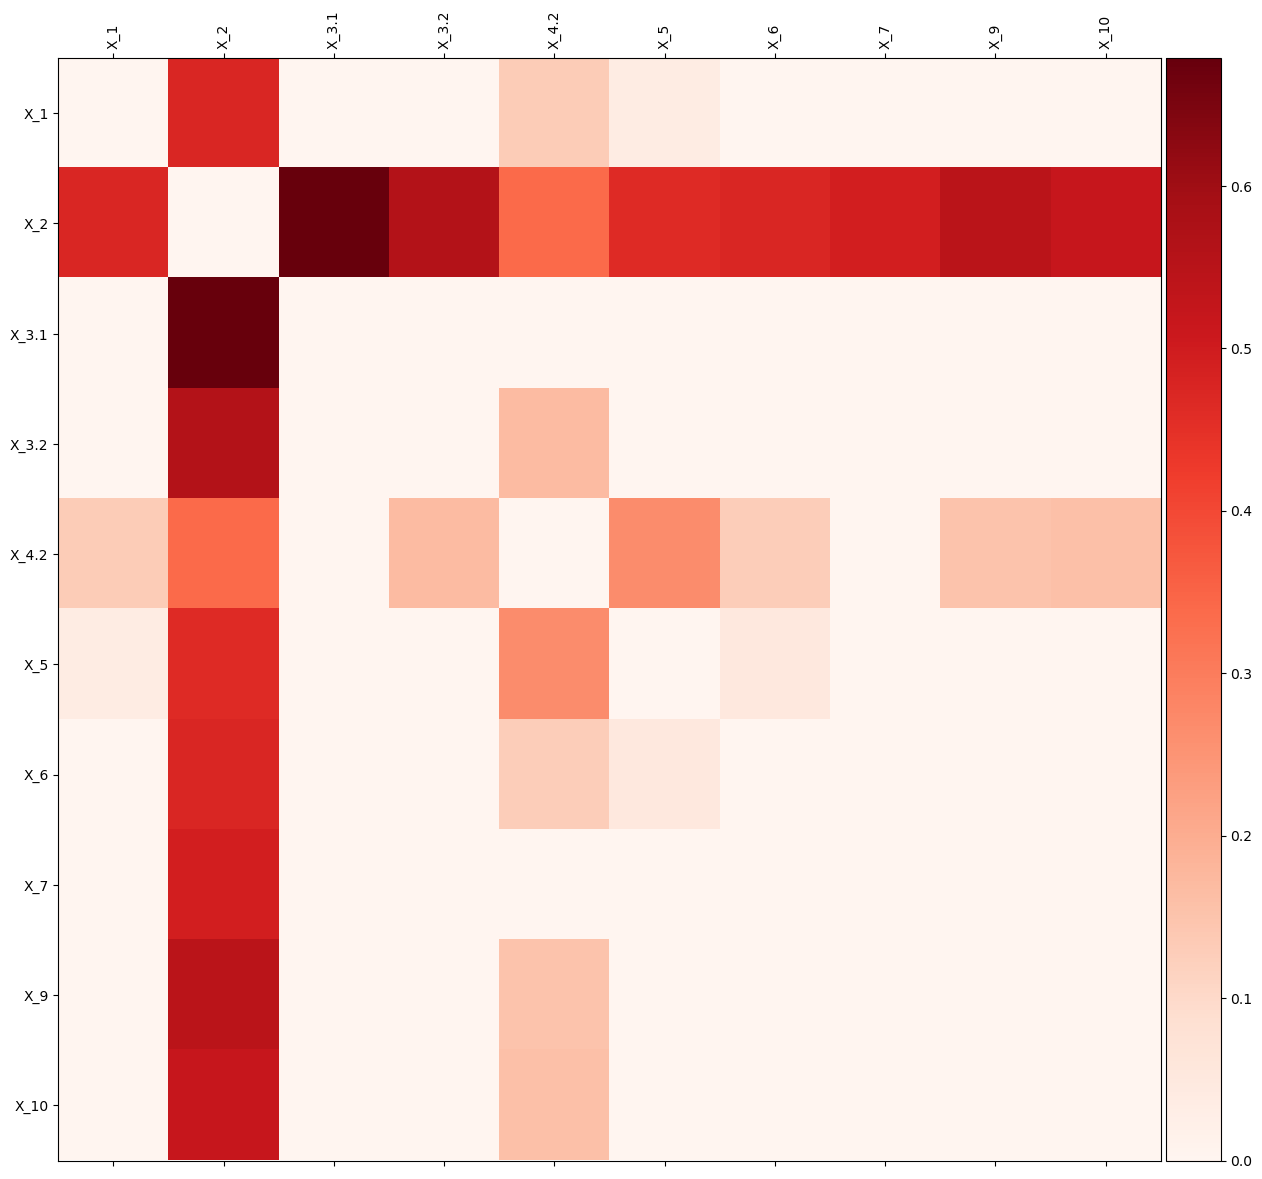

In [334]:
# from svd
fig, ax = plt.subplots(1,1,figsize=(15,15))
r = ax.matshow(np.real(G_dir), cmap = "Reds", vmin=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(r, cax=cax)

ax.set_xticks([x for x in range(labels_select.__len__())], labels_select, rotation='vertical');
ax.set_yticks([x for x in range(labels_select.__len__())], labels_select);

In [419]:
# 2-30 is described by being almost identical -> very narrow distribution. scipy integrate can not be trusted here


# 6-26, 7-25, 8-24 are also almost "1 to 1" except for a small vertical line
#   - Estimate H(X) for both variables independent af oberve difference

In [139]:
i = 4
j = -3

print(labels_select[i], ",",labels_select[j])


X_4.1 , X_8


-0.6927949745465821, 0.699977841115026


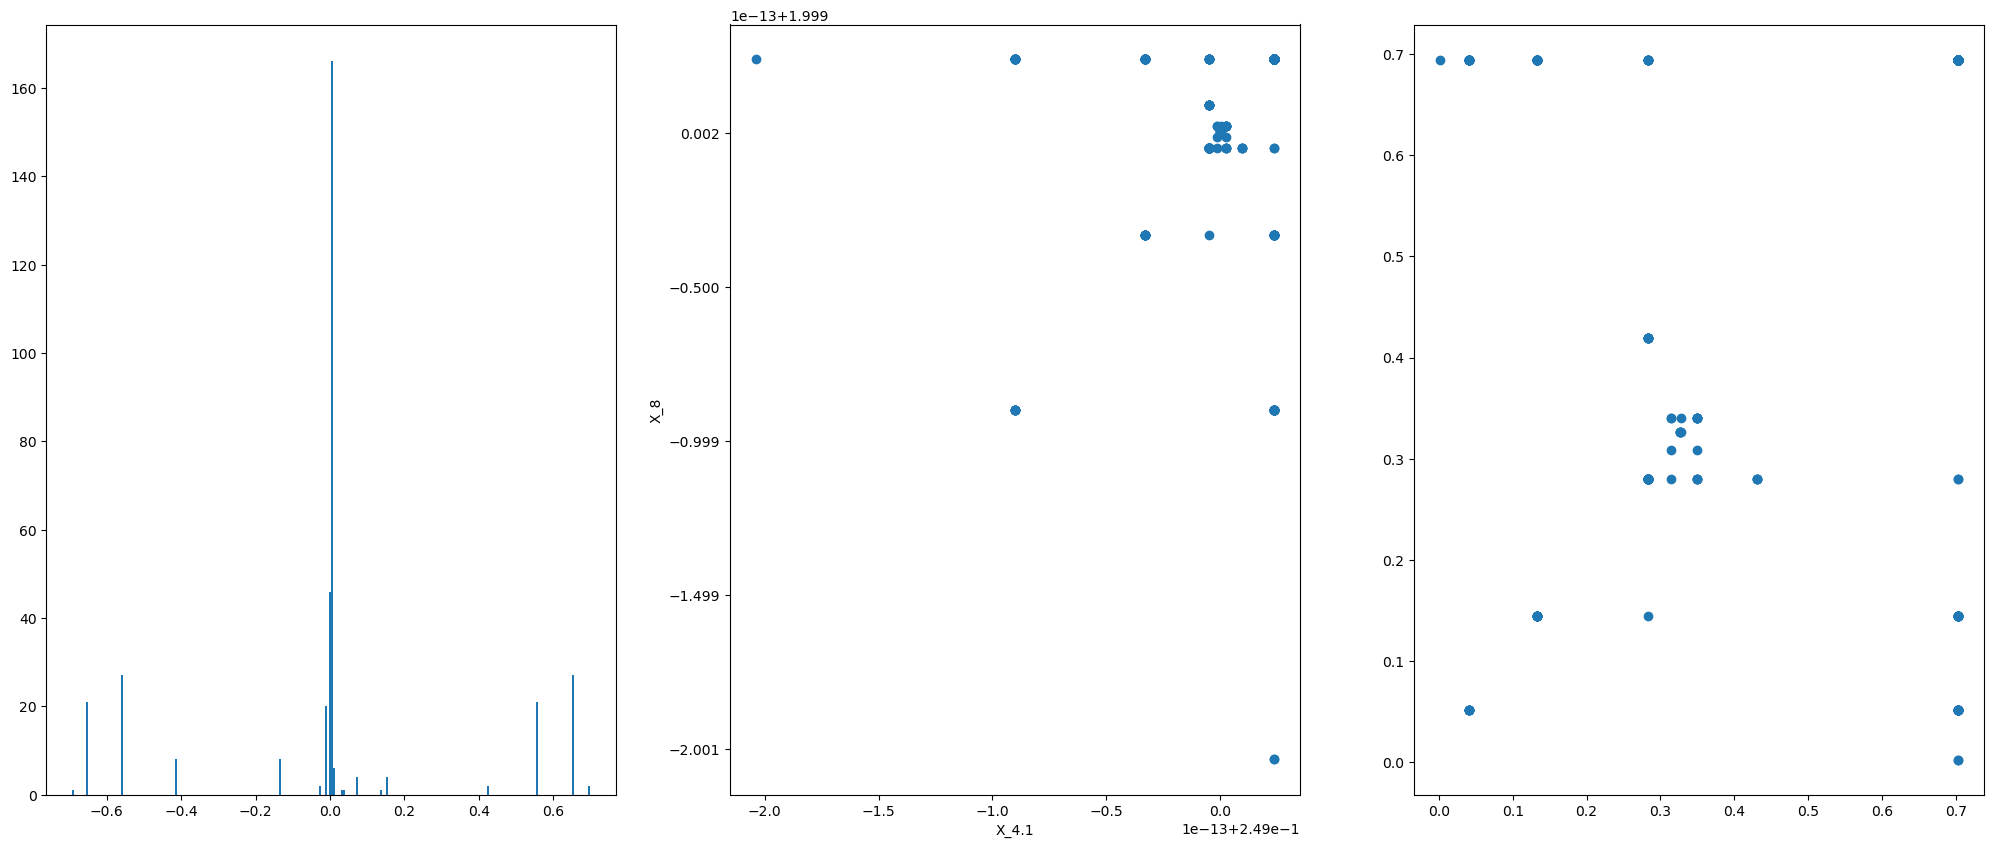

In [140]:
fig, ax = plt.subplots(1,3,figsize=(25,10))

Diff = U_select[i,:] - U_select[j,:]
ax.flat[0].hist(Diff, bins=256)
print(f"{(U_select[i,:] - U_select[j,:]).min()}, {(U_select[i,:] - U_select[j,:]).max()}")


ax.flat[1].scatter(X_select[i,:], X_select[j,:])
ax.flat[1].set_xlabel(labels_select[i])
ax.flat[1].set_ylabel(labels_select[j])


ax.flat[2].scatter(U_select[i,:], U_select[j,:]);

In [230]:
(np.abs(Diff) > 0.005).sum()

0

In [558]:
kernel_ij = gaussian_kde(np.vstack(U[[i,j],:]))

kernel_i = gaussian_kde(U[i,:])
kernel_j = gaussian_kde(U[j,:])

In [559]:
# -NCE of 1D u1 and u2
print(scipy.integrate.quad(lambda x: kernel_i.pdf(x)*kernel_i.logpdf(x), 0,1)[0] / scipy.integrate.quad(lambda x: kernel_i.pdf(x), 0,1)[0])

print(scipy.integrate.quad(lambda x: kernel_j.pdf(x)*kernel_j.logpdf(x), 0,1)[0] / scipy.integrate.quad(lambda x: kernel_j.pdf(x), 0,1)[0])


# equal for (D_2,S_2)

0.18096091560675678
0.4489820524958451


In [504]:
# Different ways of calculating probability mass within [0,1]^2 (first is much faster and results are equivalent)
print(kernel_ij.integrate_box(low_bounds=[0,0], high_bounds=[1,1]))

print(scipy.integrate.dblquad(lambda x,y :kernel_ij.pdf(np.vstack([x,y]))/ 10**8 , 0,1, 0,1))

# Not at all equal for (D_2,S_2)

0.9622714112437025
(0.0, 0)


In [532]:
n_sub = 100_000_000

l = 80_000_000
u = 80_000_010

opts=[
    {"limit": 1000},
    {"limit": 1000}
    ]

int = scipy.integrate.nquad(lambda x,y :kernel_ij.pdf(np.vstack([x,y])/n_sub), [[l,u],[l,u]], opts = opts )

print(int)

print( int[0] / n_sub**2 * (n_sub / (u-l)) )

# opts=[
#     {"points": np.linspace(0,1,50), "limit": 100},
#     {"points": np.linspace(0,1,50), "limit": 100}
#     ]




(981818696.3304441, 10.231822836300125)
0.981818696330444


In [487]:
kernel_ij.logpdf([0.5,0])

array([-6.45464522e+16])

In [499]:
scipy.integrate.dblquad(lambda x,y : (kernel_ij.pdf(np.vstack([x,y])) / 10**8) * (kernel_ij.logpdf(np.vstack([x,y])) / 10**15) , 0,1, 0,1)

(0.0, 0)

In [501]:
def integ(u1, u2):
    return max(0, (4 - 12*u1) + (6 - 12*u2))

scipy.integrate.dblquad(integ , 0,1, 0,1)

(1.1574074091845363, 5.4272168270084395e-08)

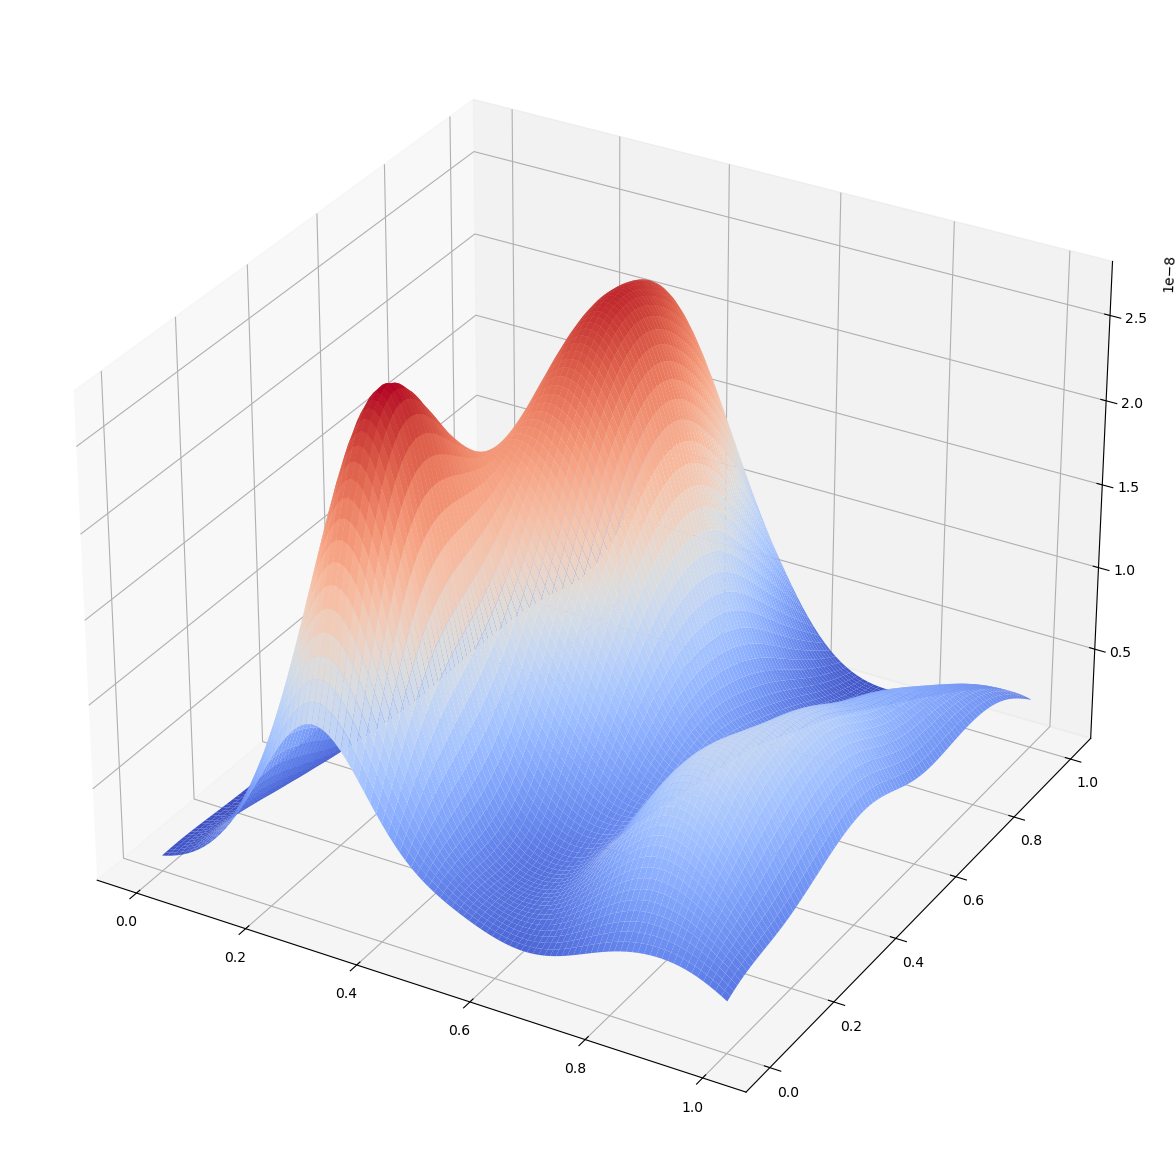

In [101]:
XX,YY = np.mgrid[0:1:100j, 0:1:100j]

pdf_eval = kernel_ij.pdf(np.vstack([XX.ravel(),YY.ravel()]))
# pdf_eval = kernel_i(XX.ravel()) * kernel_j(YY.ravel())

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
ax.plot_surface(XX, YY, np.reshape(pdf_eval, XX.shape)/10**8, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')

# ax.view_init(60, 35)

In [366]:
kernel_i([XX[0,0]])

array([0.00534252])

In [367]:
kernel_j(YY[0,0])

array([0.00534252])

In [412]:
np.log(pdf_eval)[np.log(pdf_eval) > 0]

C:\Users\jonas\AppData\Local\Temp\ipykernel_14628\1116779110.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(pdf_eval)[np.log(pdf_eval) > 0]


array([8.48179545e-02, 3.91755694e-03, 3.81983684e-01, 1.19311207e-02,
       2.90269855e-01, 6.68162769e-01, 2.97935651e-01, 5.65636504e-01,
       9.43356222e-01, 5.72952063e-01, 8.30018660e-01, 1.20756517e+00,
       8.36981215e-01, 1.08341761e+00, 1.46079084e+00, 1.09002406e+00,
       1.26696658e-01, 1.43639871e-01, 1.32583480e+00, 1.70303463e+00,
       1.33208165e+00, 3.68573505e-01, 3.75229387e-01, 1.55727184e+00,
       1.93429807e+00, 1.56315514e+00, 5.99459879e-01, 5.95841401e-01,
       1.77773054e+00, 2.15458288e+00, 1.78324583e+00, 8.19356428e-01,
       8.05478340e-01, 1.98721293e+00, 2.36389096e+00, 1.99235516e+00,
       1.02826387e+00, 1.00414299e+00, 2.18572133e+00, 2.56222447e+00,
       2.19048473e+00, 1.22618301e+00, 2.43599940e-01, 1.19183856e+00,
       2.37325837e+00, 2.74958584e+00, 2.37763634e+00, 1.41311473e+00,
       1.50911679e-01, 4.19627582e-01, 1.36856878e+00, 2.54982703e+00,
       2.92597780e+00, 2.55381199e+00, 1.58906002e+00, 1.62612228e-01,
      

In [370]:
kernel_ij.covariance

array([[0.00939376, 0.00939376],
       [0.00939376, 0.00939376]])

In [333]:
kernel_i.covariance**0.5

array([[0.07959604]])

In [329]:
h[[2,30]]

array([0.12544782, 0.12544782])

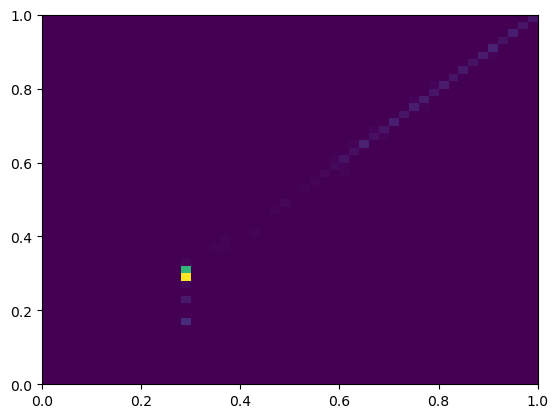

In [396]:
plt.hist2d(U[i,:], U[j,:], range = [[0, 1], [0, 1]], bins=[50,50]);

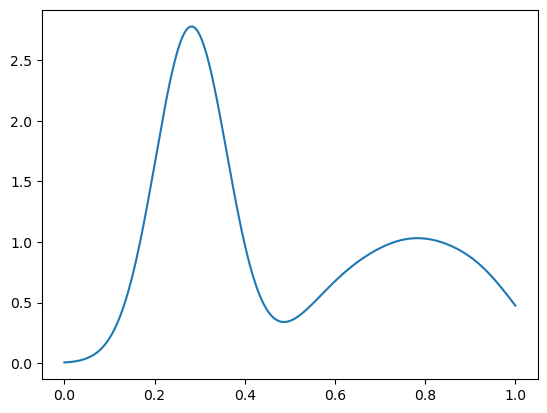

In [320]:
u1 = np.linspace(0,1,1000)

p1 = kernel_j(u1)

plt.plot(u1,p1)

In [319]:
kernel_j = gaussian_kde(U[30,:])

(array([  2.,   0.,   0.,   0.,  17.,   0.,   2.,  27.,  62., 258.]),
 array([-3.76587650e-13, -3.34920980e-13, -2.93254310e-13, -2.51587640e-13,
        -2.09920969e-13, -1.68254299e-13, -1.26587629e-13, -8.49209592e-14,
        -4.32542890e-14, -1.58761893e-15,  4.00790512e-14]),
 <BarContainer object of 10 artists>)

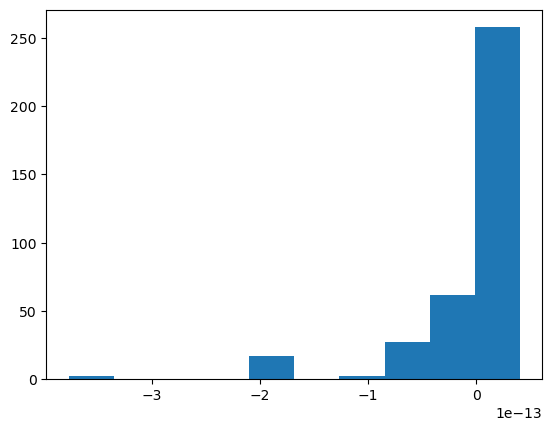

In [381]:
plt.hist(U[30,:] - U[2,:])

(array([262.,   0.,   0.,   1.,   4.,   9.,  22.,  23.,  25.,  22.]),
 array([0.35856769, 0.42257505, 0.48658241, 0.55058977, 0.61459714,
        0.6786045 , 0.74261186, 0.80661922, 0.87062658, 0.93463394,
        0.9986413 ]),
 <BarContainer object of 10 artists>)

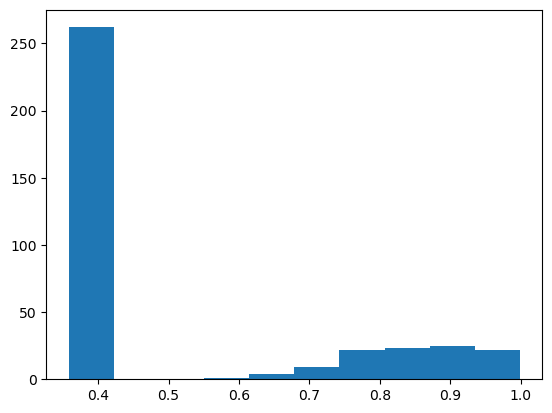

In [108]:
plt.hist(U[9,:])

# Directional matrix

In [5]:
# with open('G.pkl', 'wb') as f:
#     pickle.dump({"G": G, "labels":labels}, f)

with open('G.pkl', 'rb') as f:
    res = pickle.load(f)

G = res["G"]
labels = res["labels"]

In [6]:
print(G[G==G].min())
print(G[G==G].max())
print(G[G!=G])

0.0
1.739650070084554
[]


In [356]:
G.shape

(34, 34)

In [7]:
X_skip = ["X_4.1", "X_4.3", "X_8"]

idx_D = list(np.where([l[0] == "D" for l in labels])[0])
idx_S = list(np.where([l[0] == "S" for l in labels])[0])
idx_X = list(np.where([l[0] == "X" for l in labels])[0])

idx_X_skip = list(np.where([X_skip.__contains__(l) for l in labels])[0])


idx_X = list( set(idx_X) - set(idx_X_skip) )


# idx_select = idx_D + idx_X + idx_S
idx_select = idx_S

G_select = G[idx_select,:][:,idx_select]
labels_select = labels[idx_select]

X_select = X[idx_select,:]
U_select = U[idx_select,:]


NameError: name 'X' is not defined

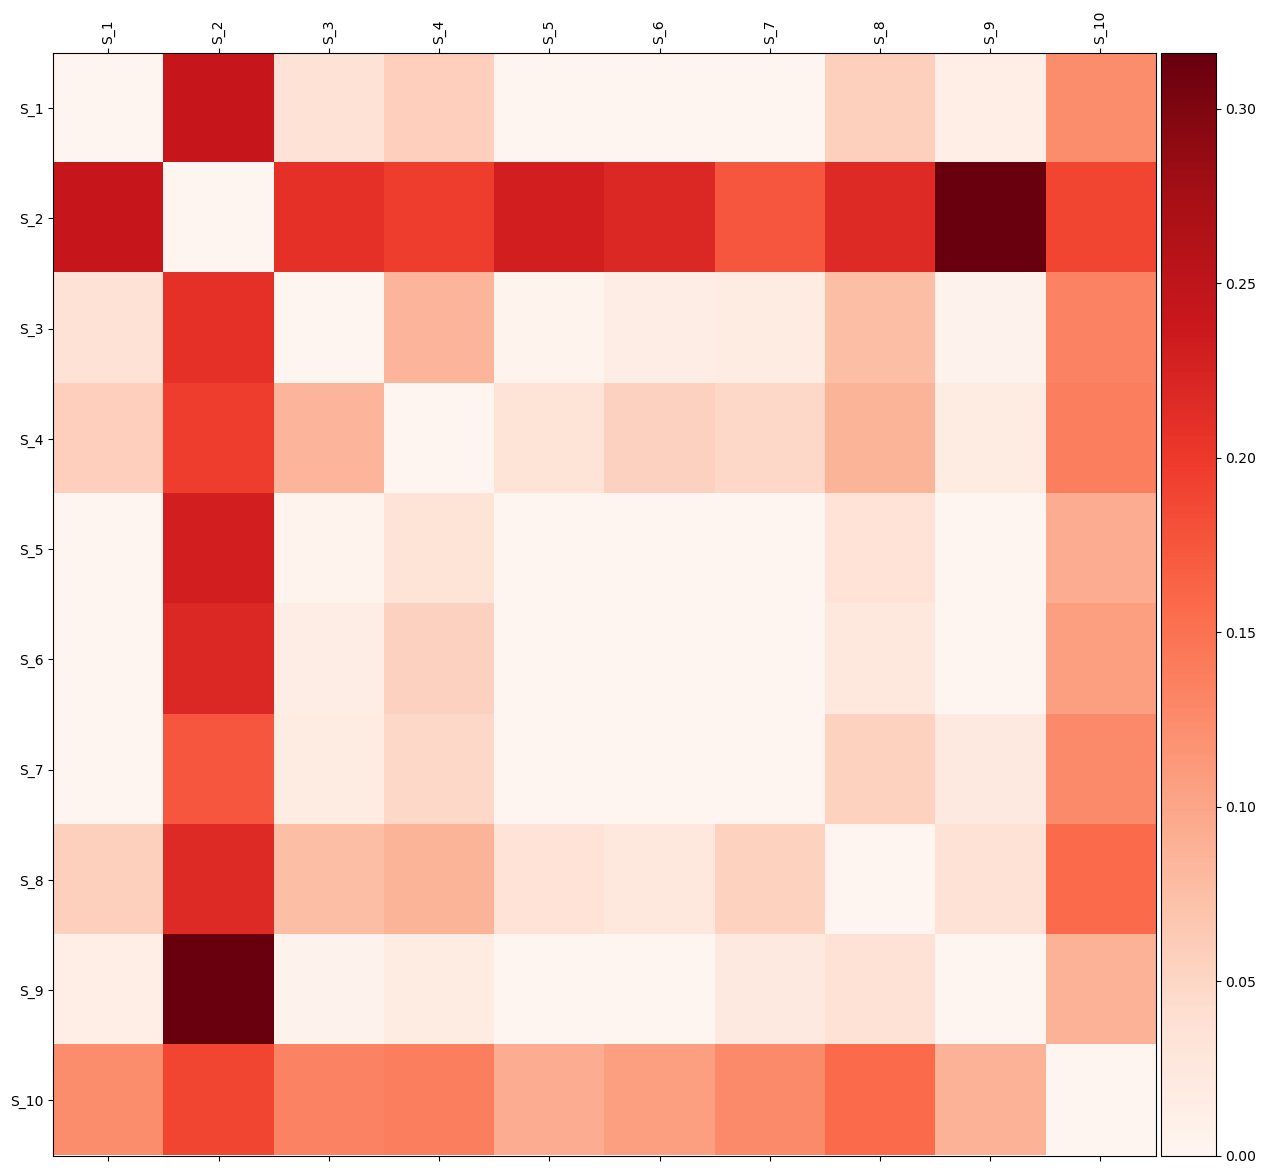

In [8]:
# eg = np.linalg.eig(np.real(G_q))
# G_dir = np.real(eg.eigenvectors @ np.diag(eg.eigenvalues / (1 + eg.eigenvalues)) @ eg.eigenvectors.T)

G_dir = ND(G_select.copy(), alpha=1, beta=1)

fig, ax = plt.subplots(1,1,figsize=(15,15))
r = ax.matshow(G_dir, cmap = "Reds", vmin=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(r, cax=cax)

ax.set_xticks([x for x in range(labels_select.__len__())], labels_select, rotation='vertical');
ax.set_yticks([x for x in range(labels_select.__len__())], labels_select);

In [53]:
G_dir = G @ np.linalg.pinv(np.identity(N) + G)

# other method (not better or worse)
# eg = np.linalg.eig(G)
# (G_dir - eg.eigenvectors @ np.diag(eg.eigenvalues / (1 + eg.eigenvalues)) @ eg.eigenvectors.T).min()

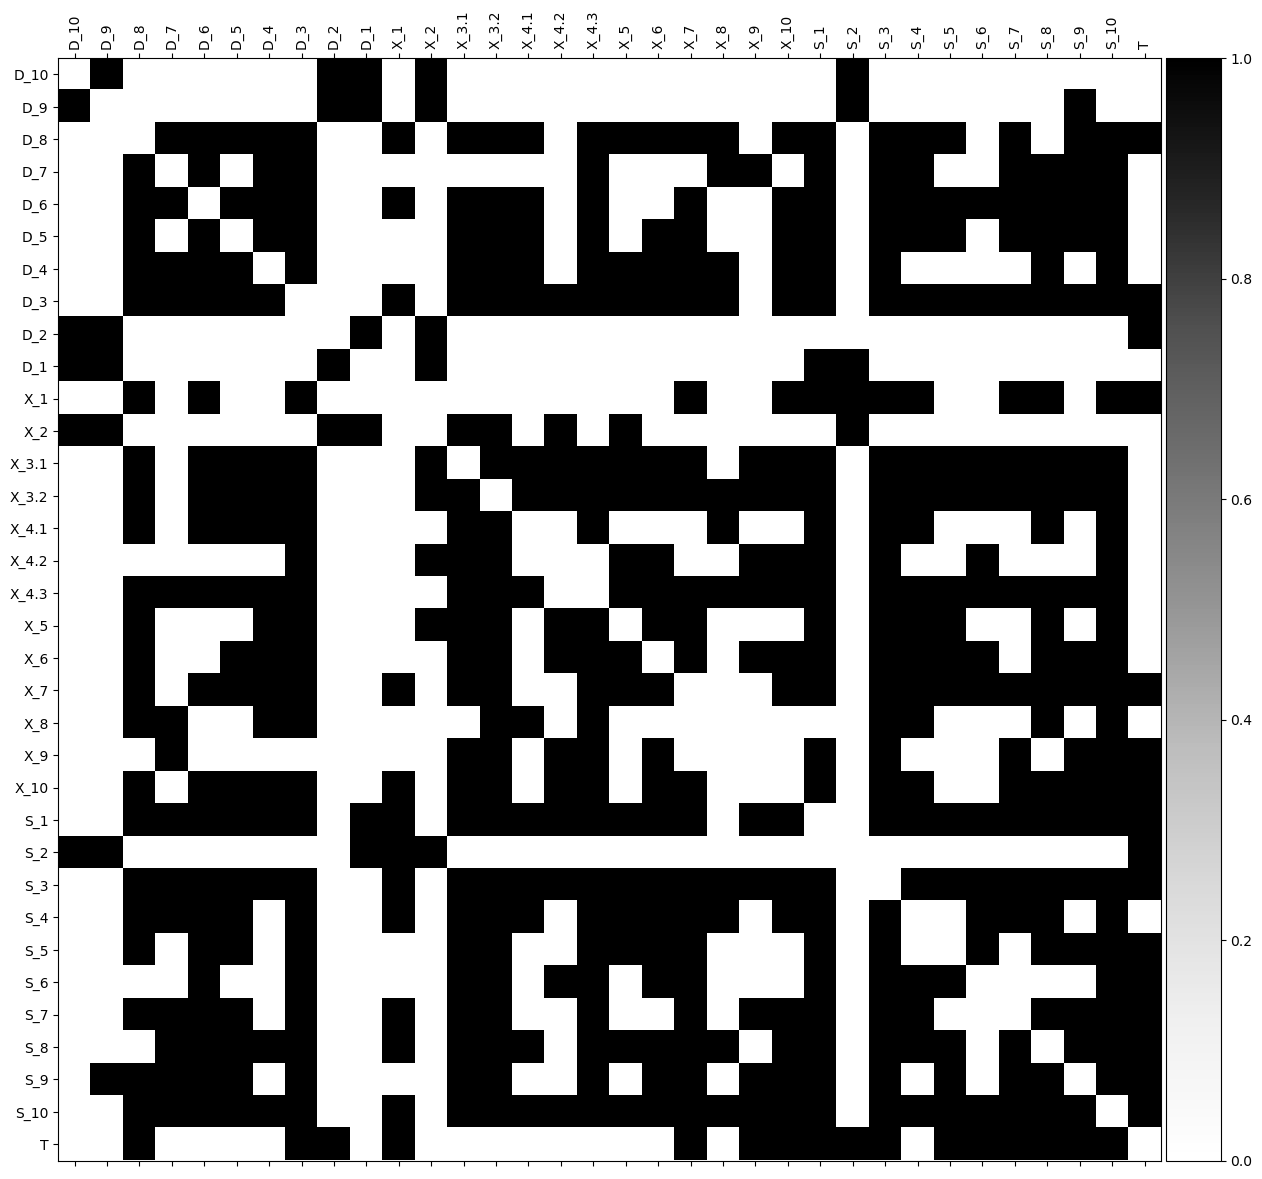

In [140]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
# ub = max(abs(G_dir.min()), G_dir.max())



G_dir_logi = G_dir.copy()
G_dir_logi[G_dir_logi < 0] = 0
np.fill_diagonal(G_dir_logi,0)

t = 0.0245
G_adj = G_dir_logi >= t
r = ax.matshow(G_adj, cmap = "Greys")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(r, cax=cax)

# labels
ax.set_xticks([x for x in range(labels.__len__())], labels, rotation='vertical');
ax.set_yticks([x for x in range(labels.__len__())], labels);

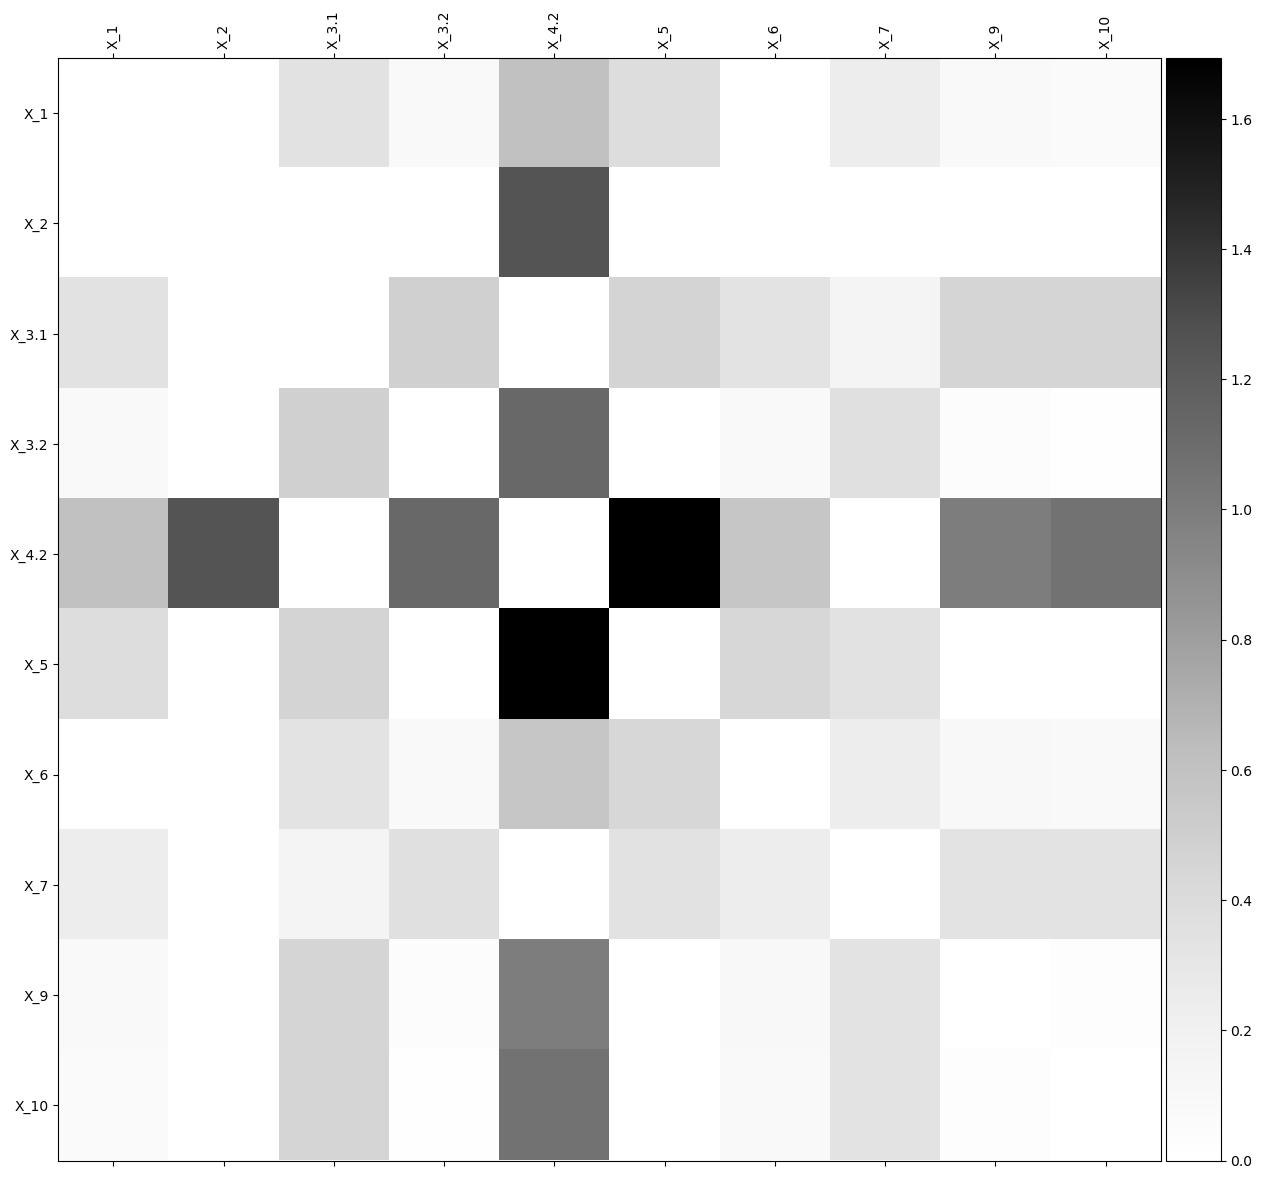

In [215]:
# G_dir = G[23:33,23:33] @ np.linalg.pinv(np.identity(10) + G[23:33,23:33])
fig, ax = plt.subplots(1,1,figsize=(15,15))
# ub = max(abs(G_dir.min()), G_dir.max())



G_dir_logi = G_dir.copy()
G_dir_logi[G_dir_logi < 0] = 0
np.fill_diagonal(G_dir_logi,0)

t = G_dir_logi.max()*0.2
G_adj = G_dir_logi >= t
# r = ax.matshow(G_adj, cmap = "Greys")
r = ax.matshow(G_dir_logi, cmap = "Greys")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(r, cax=cax)

# labels
ax.set_xticks([x for x in range(10)], labels_select, rotation='vertical');
ax.set_yticks([x for x in range(10)], labels_select);

In [136]:
t

0.02431072069767537

In [50]:
figures_path = "C:/Users/jonas/Git/Analysis-of-Production-flow-systems-with-focus-on-industry/Latex Thesis/figures/"

In [39]:
# First index is different variables

N=3
n_sample = 10_000

mean = np.zeros(N)
cor = np.array([
    [1, 0.9, 0],
    [0.9, 1, 0],
    [0, 0, 1]
    ])
# s = np.array([0.07, 0.3, 0.9])
s = np.array([1,2,3])
# s = np.array([1,1,1])


# Make covariance matrix (from correlations structure and standard deviations)
cov = s[:,None] * cor * s

X = np.random.default_rng().multivariate_normal(mean = mean, cov = cov, size = n_sample).T


# X = np.exp(X)
# m1 = np.random.normal(,size=n)
# m2 = np.random.normal(size=n)

# Normalize
# X = ( X - X.mean() ) / X.std()

# X **=  0.1

In [40]:
# Prepare Kernels, transformed data to uniform (from kernel), Scott's optimal bandwiths
kernels_X = [gaussian_kde(X[i,:]) for i in range(N)]

U = np.vstack( [np.array([kernels_X[i].integrate_box_1d(-np.inf, x_i) for x_i in X[i,:]]) for i in range(N) ])
kernels_U = [gaussian_kde(U[i,:]) for i in range(N)]

h = np.array([(kernels_X[i].covariance**0.5)[0,0] for i in range(N)])

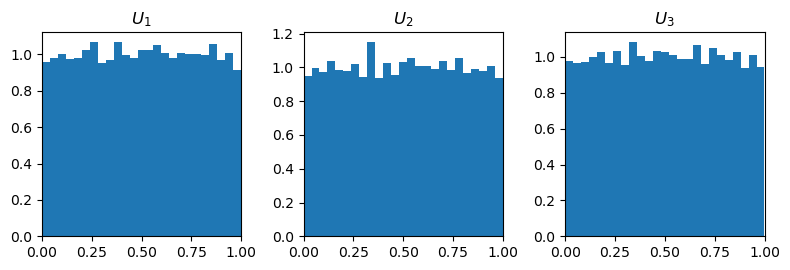

In [41]:
n_cols = int(np.ceil(np.sqrt(N)))
n_rows = int(np.ceil(N / n_cols))
# fig, ax = plt.subplots(n_rows,n_cols, figsize=(15,15))
fig, ax = plt.subplots(1,3, figsize=(8,2.8))

for i in range(N):
    ax.flat[i].hist(U[i,:], density=True, bins = 25)
    ax.flat[i].set_title(f"$U_{i+1}$")
    ax.flat[i].set_xlim([0,1])

fig.tight_layout()

# plt.savefig(figures_path + "ND examples/Gaussian 3x3 large s power uniforms.pdf", bbox_inches='tight')

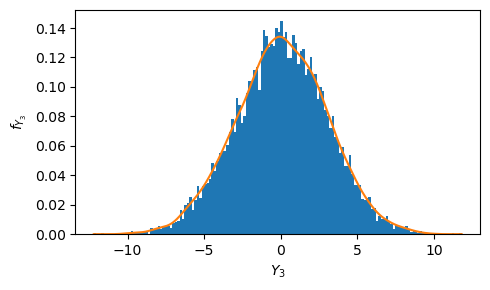

In [42]:
# densities
fig, ax = plt.subplots(1,1,figsize=(5,3))
ax.hist(X[2,:],bins = 150, density=True)

# x_lim = [-200,200]

xx = np.linspace(X[2,:].min(), X[2,:].max(), 1000)
# xx = np.linspace(x_lim[0], x_lim[1], 1000)
pdf = kernels_X[2](xx)
ax.plot(xx,pdf)
# ax.set_xlim(*x_lim)
ax.set_xlabel("$Y_3$")
ax.set_ylabel("$f_{Y_3}$")

fig.tight_layout()

# plt.savefig(figures_path + "ND examples/Gaussian 3x3 large s power X3 KDE.pdf", bbox_inches='tight')

In [43]:
kernels_X[2].integrate_box_1d(0, np.inf)

0.5110592084904899

In [44]:
(X[2,:] <= 200).mean()

1.0

In [45]:
U[0,:].min()

0.0001339456419798166

In [263]:
G = np.zeros((N,N))

count = 0


for i in range(N-1):
    kernel_i = kernels_U[i]
    # h_i = h[i]
    u_i = U[i,:]
    for j in range(i+1, N):
        print(f"{ count } / { (N*(N-1)/2) :3.0f}    [{100*count/ (N*(N-1)/2) :7.2f}%]    ({i}, {j})\033[K", end ="\r")

        u_j = U[j,:]

        kernel_ij = gaussian_kde(np.vstack([u_i,u_j]))

        d_vol = kernel_ij.integrate_box(
                low_bounds = [0,0],
                high_bounds = [1,1]
            )
        
        # Simple normalization of KDE such that integrates to 1 (no jackknifing)
        G[i,j] = G[j,i] = \
            scipy.integrate.dblquad(
                lambda x,y : 
                    kernel_ij.pdf(np.vstack([x,y])) * \
                    kernel_ij.logpdf(np.vstack([x,y])),
                0,1,
                0,1
            )[0] / d_vol - np.log(d_vol)

        count += 1
        print(f"{ count } / { (N*(N-1)/2) :3.0f}    [{100*count/ (N*(N-1)/2) :7.2f}%]    ({i}, {j})\033[K", end ="\r")
        

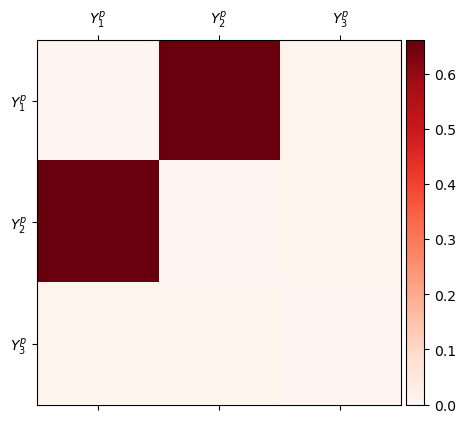

In [264]:
G_dir = ND(G, alpha=1, beta=0.99)

fig, ax = plt.subplots(1,1,figsize=(5,5))
r = ax.matshow(G_dir, cmap = "Reds", vmin=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

labels_select = [0,1,2]

plt.colorbar(r, cax=cax)
try:
    # ax.set_xticks([x+2 for x in range(labels_select.__len__())], labels_select, rotation='vertical');
    ax.set_xticks(
        [x for x in range(labels_select.__len__())], 
        [f"$Y_{x+1}" + "^p$" for x in range(labels_select.__len__())]
    );
    ax.set_yticks(
        [x for x in range(labels_select.__len__())], 
        [f"$Y_{x+1}" + "^p$" for x in range(labels_select.__len__())]
    );
except:
    None

# plt.savefig(figures_path + "ND examples/Gaussian 3x3 large s power.pdf", bbox_inches='tight')

In [265]:
G_dir

array([[-3.28961429e-01,  6.61039932e-01,  8.29683536e-03],
       [ 6.61039932e-01, -3.28958680e-01,  8.12947036e-03],
       [ 8.29683536e-03,  8.12947036e-03, -2.01994901e-04]])

In [48]:
n_mesh = 100
X1v, X2v = np.meshgrid(
    np.linspace(0,1,n_mesh), 
    np.linspace(0,1,n_mesh))

kernel_ij = gaussian_kde(np.vstack([U[0,:],U[1,:]]))

Zv = np.reshape(kernel_ij.evaluate(np.vstack([X1v.ravel(), X2v.ravel()])), (n_mesh,n_mesh))

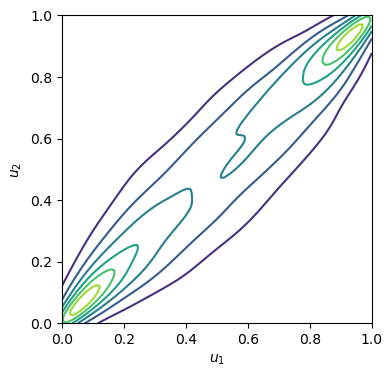

In [51]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.contour(X1v, X2v, Zv );
ax.set_xlabel("$u_1$")
ax.set_ylabel("$u_2$")

plt.savefig(figures_path + "ND examples/Gaussian copula sample contour.pdf", bbox_inches='tight')

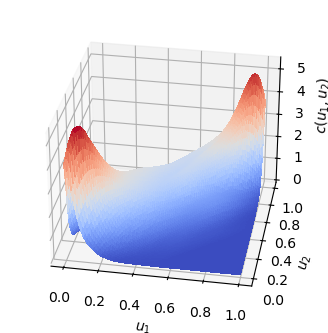

In [448]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (4,4))
ax.plot_trisurf(X1v.ravel(), X2v.ravel(), Zv.ravel(), cmap=cm.coolwarm ,linewidth=0.2, antialiased=False)
ax.view_init(30, -80, 0)
ax.set_xlabel("$u_1$")
ax.set_ylabel("$u_2$")
ax.set_zlabel("$c(u_1,u_2)$")
plt.savefig(figures_path + "ND examples/Gaussian copula sample pdf.pdf", bbox_inches='tight')

In [449]:
# theoretical copula density for Gaussian
rho = 0.9
R = np.array([[1,rho],[rho,1]])
Ri = np.linalg.pinv(R) - np.identity(2)
n_mesh = 50

U1v, U2v = np.meshgrid(np.linspace(0.01,0.99,n_mesh), np.linspace(0.01 , 0.99,n_mesh))

U1v = U1v.ravel()
U2v = U2v.ravel()

X1v = scipy.stats.norm.ppf(U1v)
X2v = scipy.stats.norm.ppf(U2v)

Xv = np.vstack( (X1v, X2v ))


Zv = (Xv * (Ri @ Xv)).sum(axis=0)
Zv = 1 / np.sqrt(np.linalg.det(R)) * np.exp(-Zv / 2)

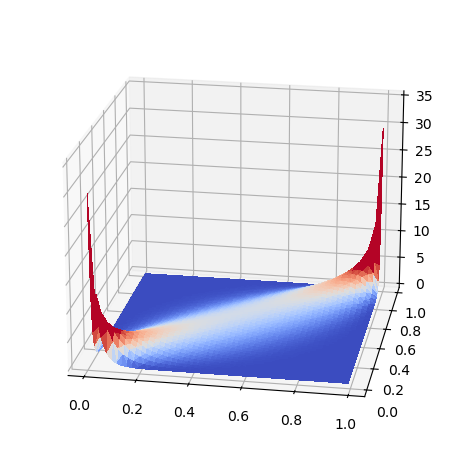

In [483]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(U1v, U2v, Zv, cmap=cm.coolwarm ,linewidth=0.2, antialiased=False, vmax = 5)
ax.set_zlim(0 , 35)
ax.view_init(20, -80, 0)
fig.tight_layout()
plt.savefig(figures_path + "ND examples/Gaussian copula theoretical pdf.pdf", bbox_inches='tight')

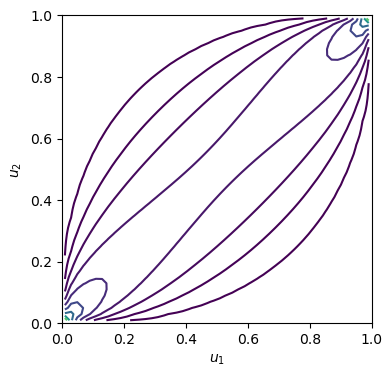

In [482]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
res = ax.contour(
    np.reshape(U1v, (n_mesh,n_mesh)), 
    np.reshape(U2v, (n_mesh,n_mesh)),
    np.reshape(Zv, (n_mesh,n_mesh)),
    levels=  32 * np.linspace(0.1,1,10)**3
    );
ax.set_xlabel("$u_1$")
ax.set_ylabel("$u_2$")
ax.set_xlim([0,1])
ax.set_ylim([0,1])

# np.exp(np.linspace(-7,3.5,10))
# np.sort([   4.,  8., 12., 16., 20., 24., 28., 32.] + [1,2] + [0.1] + [0.001] + [2.4])

plt.savefig(figures_path + "ND examples/Gaussian copula theoretical contour.pdf", bbox_inches='tight')

In [472]:
np.log(32)

3.4657359027997265

In [473]:
np.log(0.001)

-6.907755278982137

In [474]:
np.exp(np.linspace(-7,3.5,10))

array([9.11881966e-04, 2.92829969e-03, 9.40356255e-03, 3.01973834e-02,
       9.69719679e-02, 3.11403224e-01, 1.00000000e+00, 3.21127054e+00,
       1.03122585e+01, 3.31154520e+01])

In [477]:
32 * np.linspace(0,1,10)**3

array([ 0.        ,  0.04389575,  0.35116598,  1.18518519,  2.80932785,
        5.48696845,  9.48148148, 15.05624143, 22.47462277, 32.        ])

In [455]:
res.levels

array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32.])

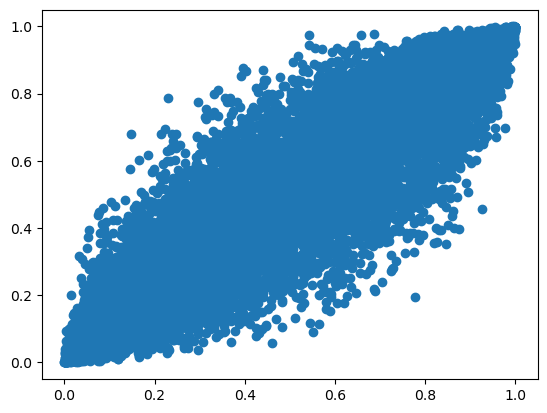

In [304]:
plt.scatter(U[0,:], U[1,:])

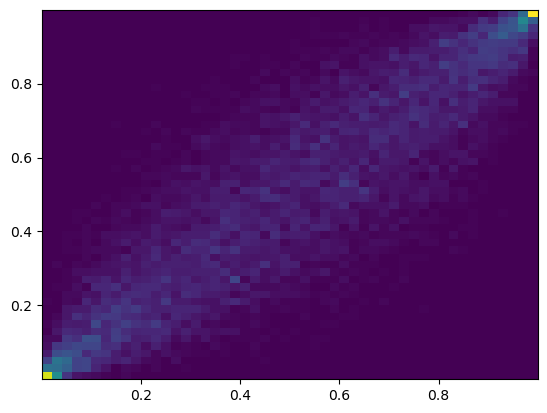

In [303]:
res = plt.hist2d(U[0,:], U[1,:], density=True, bins = (50,50));

In [301]:
print(res[0][0,0])
print(res[0][-1,-1])


500.1465103889542
200.05860415559238


In [267]:
G

array([[0.        , 0.71841756, 0.01781815],
       [0.71841756, 0.        , 0.01769672],
       [0.01781815, 0.01769672, 0.        ]])

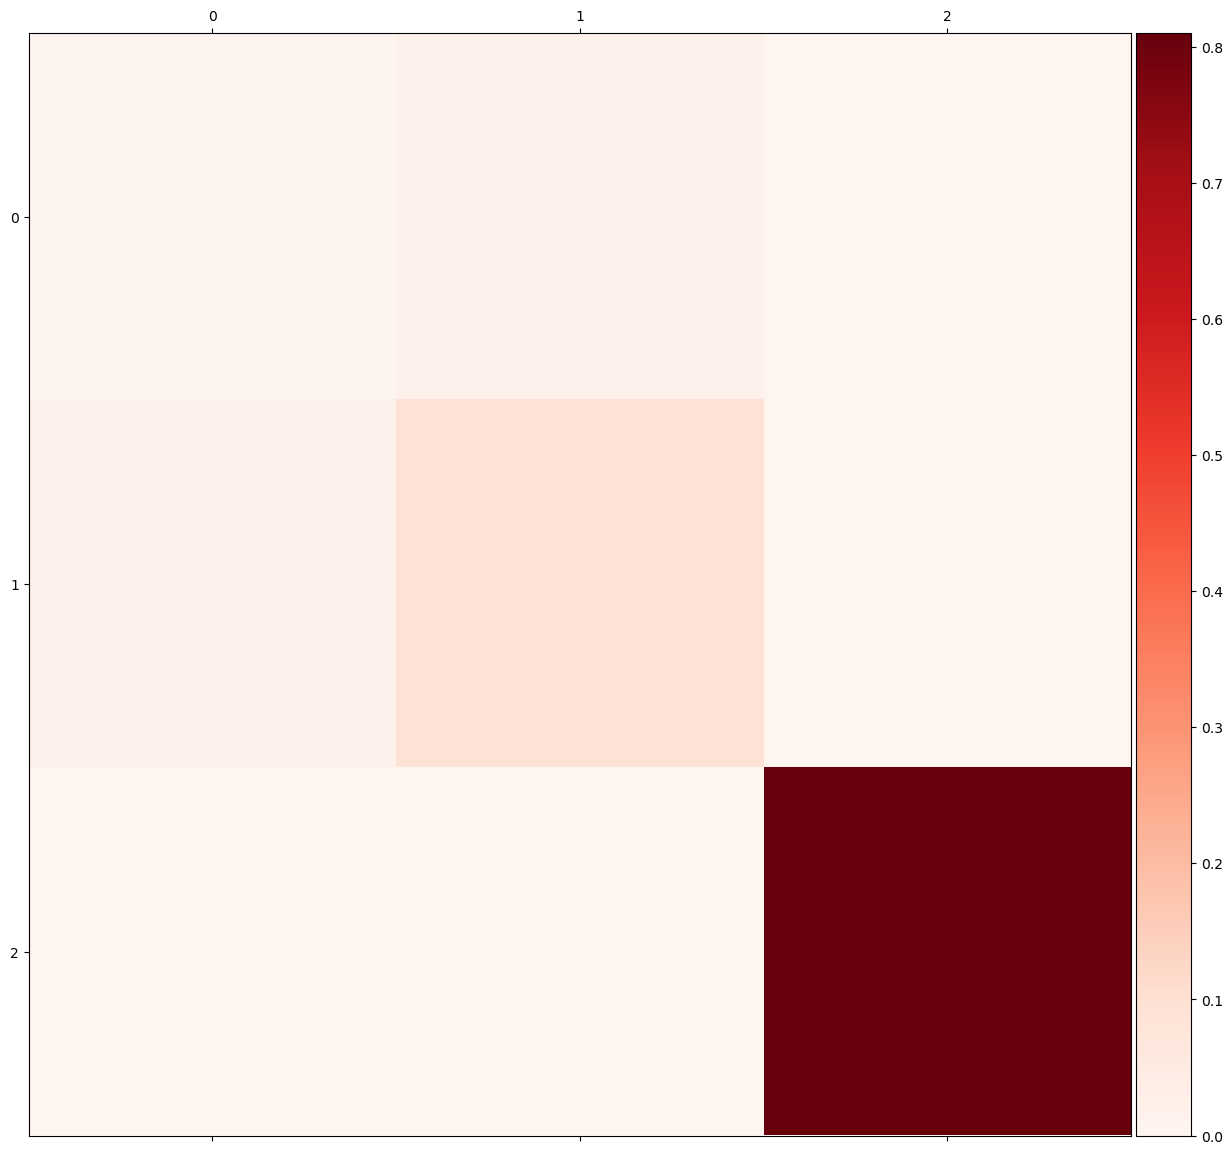

In [106]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
r = ax.matshow(cov, cmap = "Reds", vmin=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(r, cax=cax)
try:
    ax.set_xticks([x for x in range(labels_select.__len__())], labels_select, rotation='vertical');
    ax.set_yticks([x for x in range(labels_select.__len__())], labels_select);
except:
    None

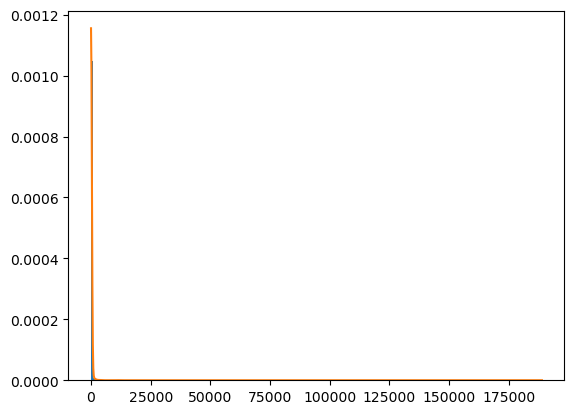

In [149]:
plt.hist(X[2,:],bins = 200, density=True)

xx = np.linspace(X[2,:].min(), X[2,:].max(), 1000)
pdf = kernels_X[2](xx)
plt.plot(xx,pdf)

In [74]:
np.log(X[2,:].max())

4.501161971121397

In [114]:
np.quantile([1,2,3],0.4)

1.8

In [115]:
(0.4*2 + 0.1*1)/0.5

1.8

In [116]:
np.__version__

'1.26.4'

## Generating correlation matrix

In [594]:
n = 10
R = np.identity(n)
# R[0,1] = 0.9
# R[1,2] = 0.9
# R[0,2] = 0.0

r = np.random.uniform(-1,1,(n)*(n-1)//2)
r = np.sign(r) * np.abs(r)**2

R[np.triu_indices(n,1)] = r

In [595]:
R = np.triu(R) + np.triu(R).T - np.identity(10)

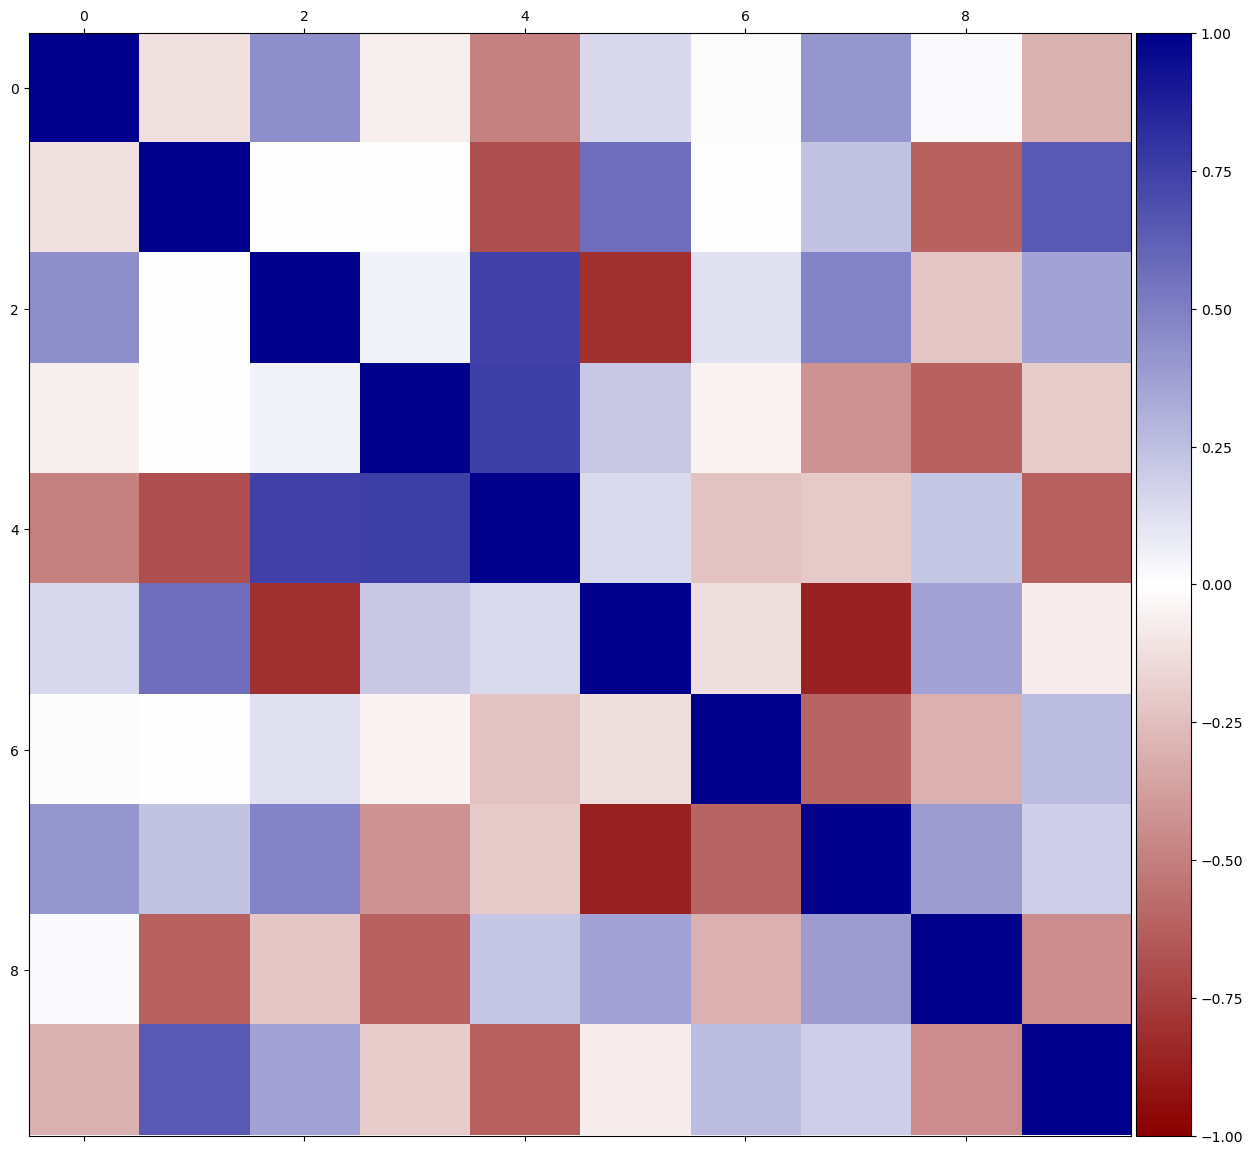

In [596]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
r = ax.matshow(R, cmap = colormap_corr, vmin = -1, vmax = 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(r, cax=cax)
# try:
#     ax.set_xticks([x for x in range(labels_select.__len__())], labels_select, rotation='vertical');
#     ax.set_yticks([x for x in range(labels_select.__len__())], labels_select);
# except:
#     None

In [597]:
eg_res = np.linalg.eig(R)
ev = eg_res.eigenvalues

ev[ev < 0] = 0
ev[ev > 1] = 1


LOL = eg_res.eigenvectors.T @ np.diag(ev) @ eg_res.eigenvectors

std = np.diag(LOL)**0.5

LOL = LOL * std**(-1) * std[:,None]**(-1)


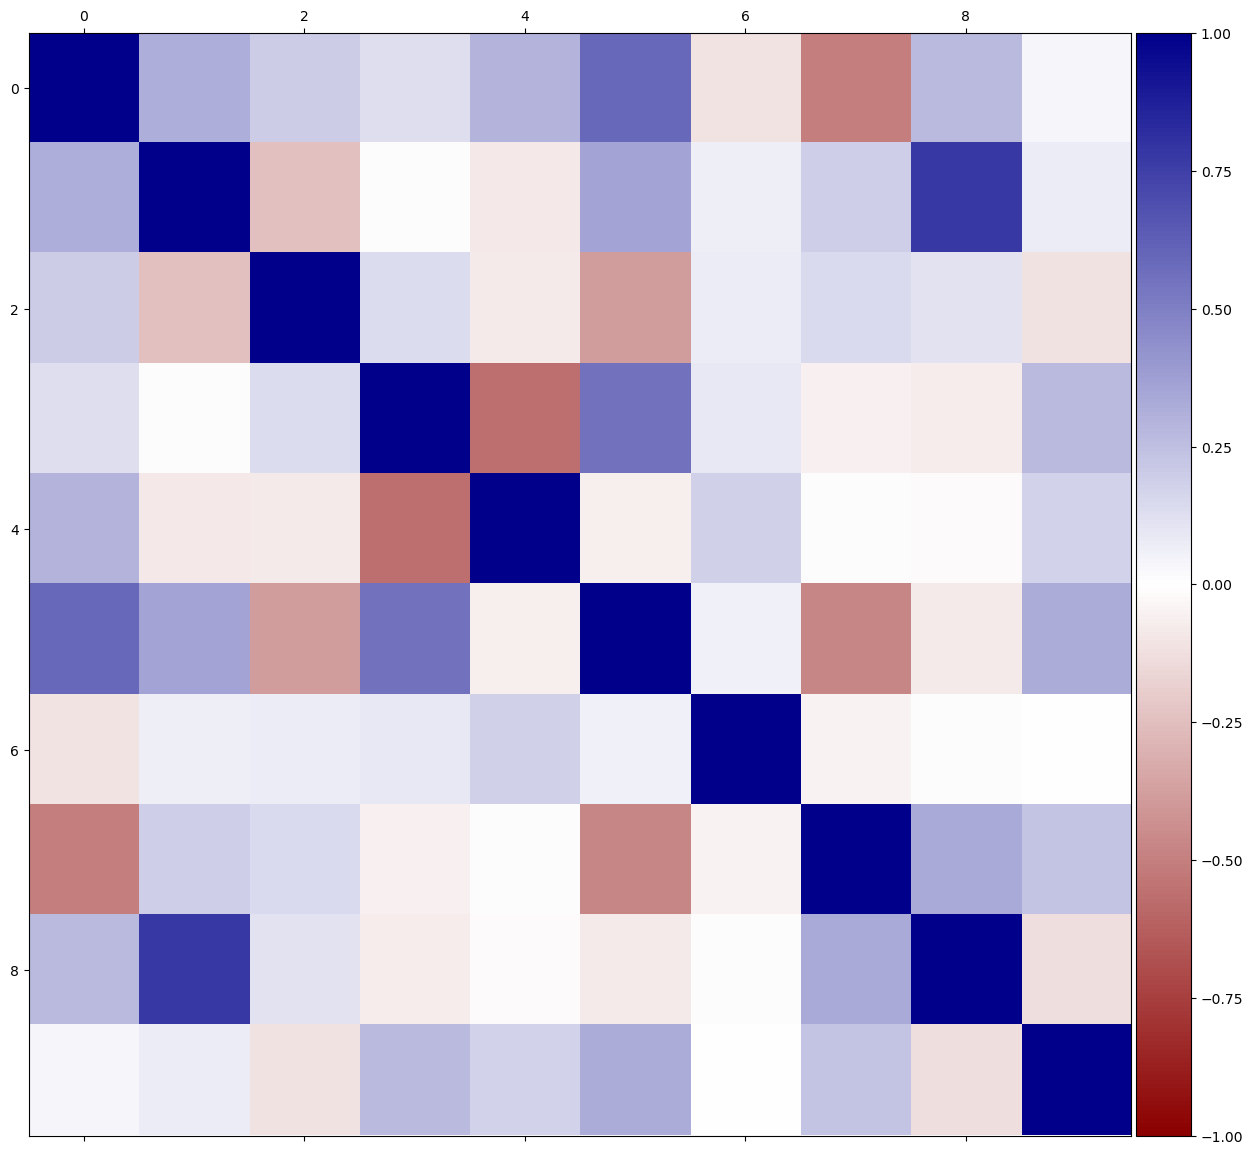

In [598]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
r = ax.matshow(LOL, cmap = colormap_corr, vmin = -1, vmax = 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(r, cax=cax)
# try:
#     ax.set_xticks([x for x in range(labels_select.__len__())], labels_select, rotation='vertical');
#     ax.set_yticks([x for x in range(labels_select.__len__())], labels_select);
# except:
#     None

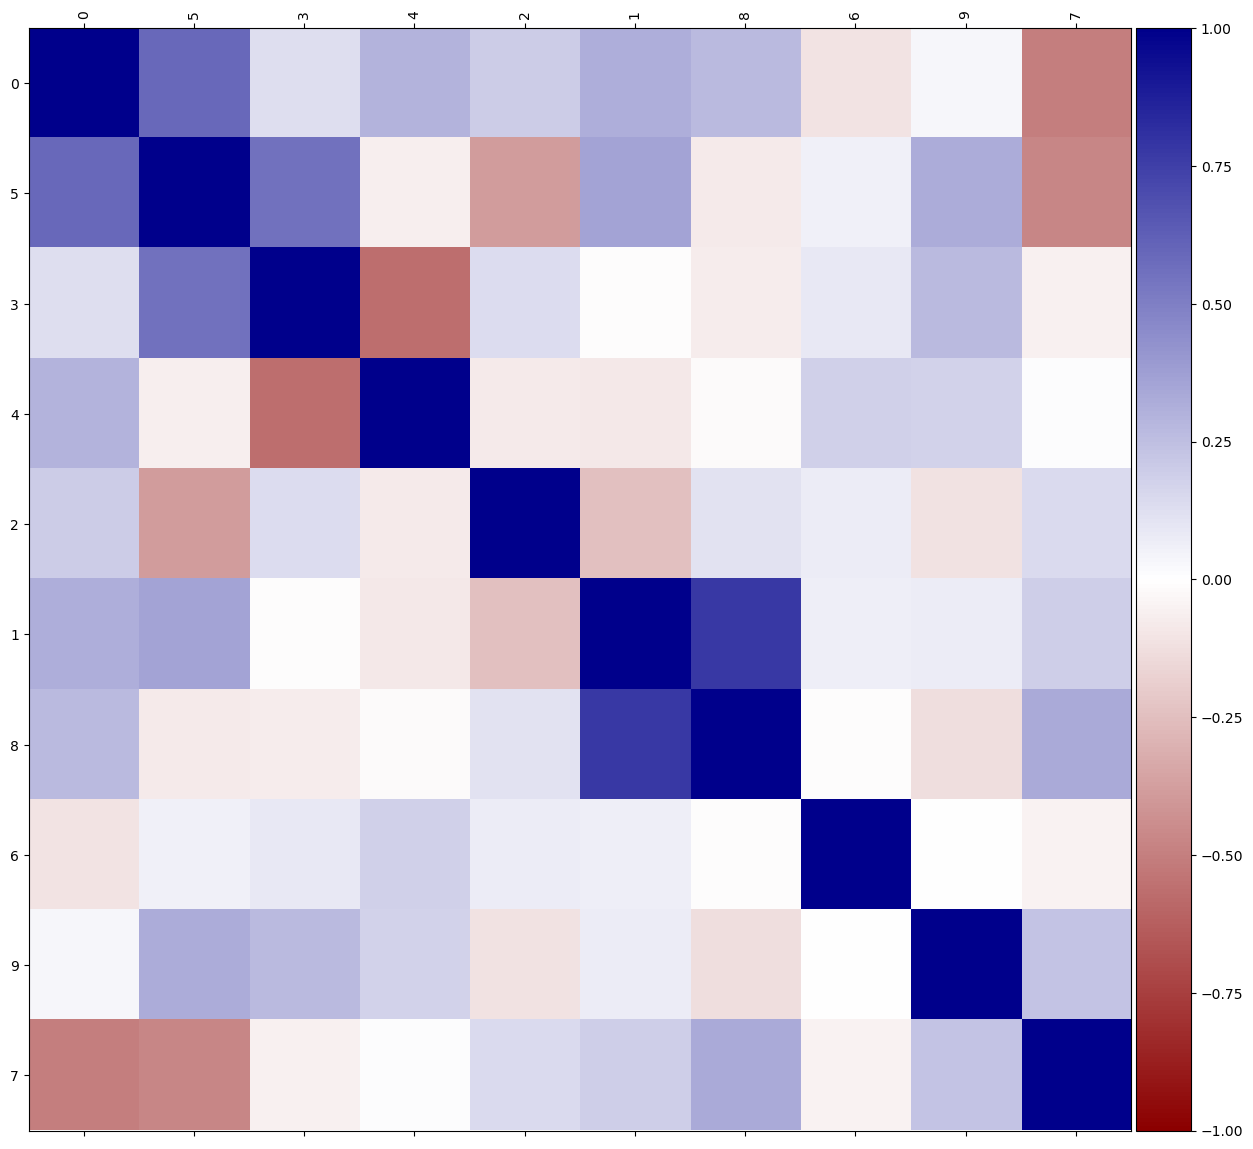

In [605]:
order_idx = [0,5,3,4,2,1,8,6,9,7]

fig, ax = plt.subplots(1,1,figsize=(15,15))
r = ax.matshow(LOL[order_idx,:][:,order_idx], cmap = colormap_corr, vmin = -1, vmax = 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(r, cax=cax)
try:
    ax.set_xticks([x for x in range(n)], order_idx, rotation='vertical');
    ax.set_yticks([x for x in range(n)], order_idx);
except:
    None

In [608]:
cor = LOL[order_idx,:][:,order_idx].copy()

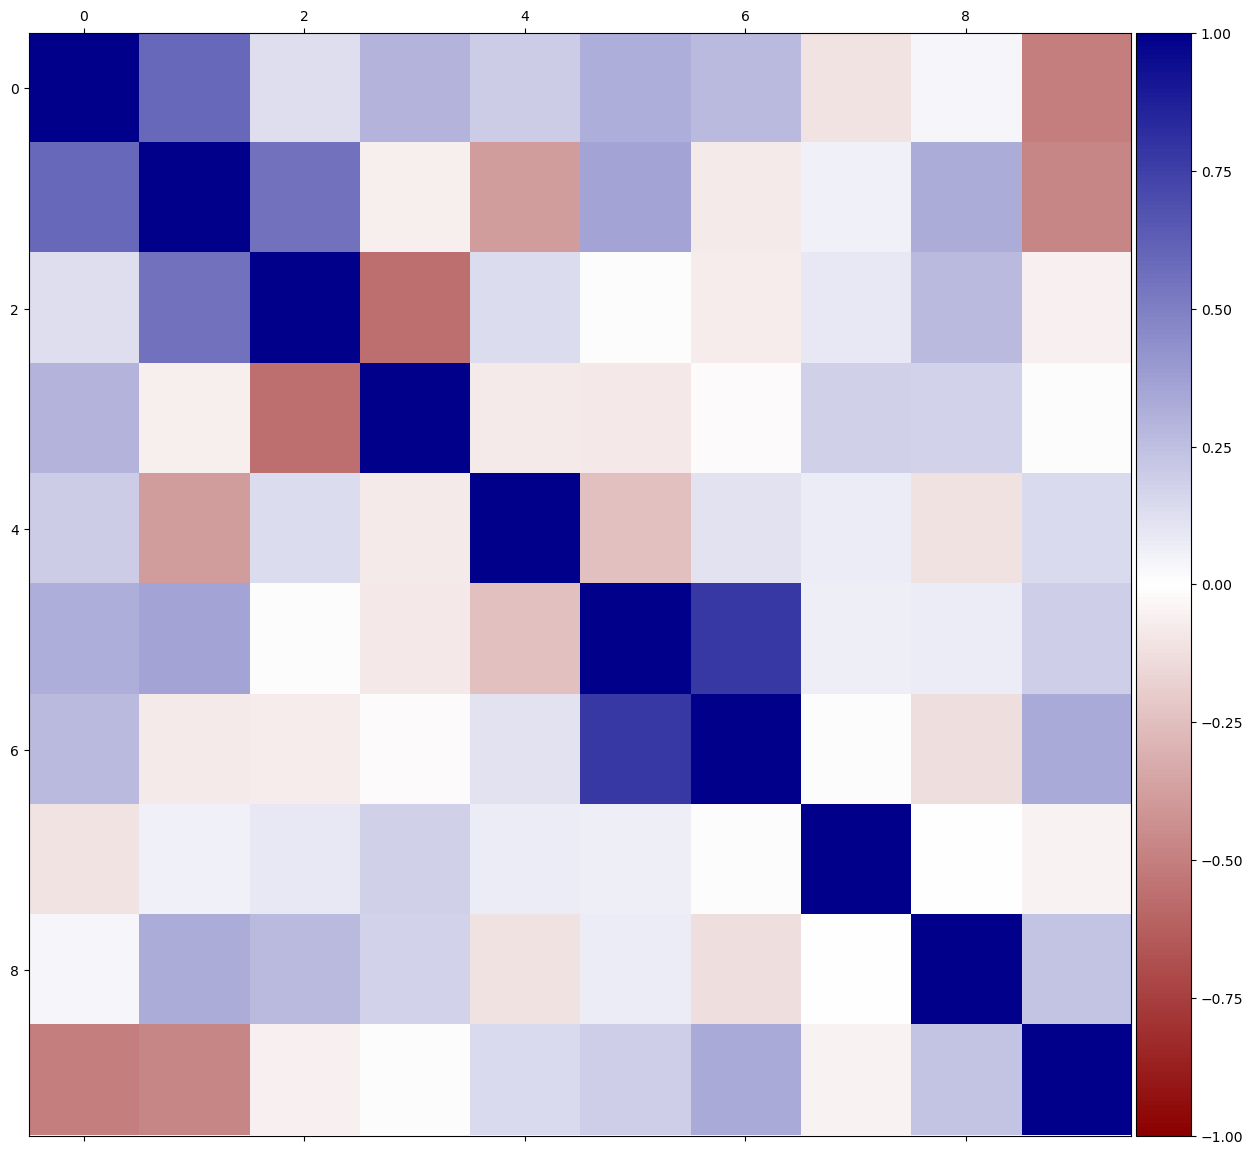

In [618]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
r = ax.matshow(cor, cmap = colormap_corr, vmin = -1, vmax = 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(r, cax=cax)
# try:
#     ax.set_xticks([x for x in range(n)], order_idx, rotation='vertical');
#     ax.set_yticks([x for x in range(n)], order_idx);
# except:
#     None

## Simulation

In [3]:
N=10
n_sample = 10_000

mean = np.zeros(N)
# np.save("N10by10_cor.npy",cor)
cor = np.load("N10by10_cor.npy")

X = np.random.default_rng().multivariate_normal(mean = mean, cov = cor, size = n_sample).T

In [4]:
X.shape

(10, 10000)

In [5]:
# Prepare Kernels, transformed data to uniform (from kernel), Scott's optimal bandwiths
kernels_X = [gaussian_kde(X[i,:]) for i in tqdm(range(N))]

U = np.vstack( [np.array([kernels_X[i].integrate_box_1d(-np.inf, x_i) for x_i in X[i,:]]) for i in tqdm(range(N)) ])
kernels_U = [gaussian_kde(U[i,:]) for i in tqdm(range(N))]

h = np.array([(kernels_X[i].covariance**0.5)[0,0] for i in tqdm(range(N))])

100%|██████████| 10/10 [00:00<?, ?it/s]


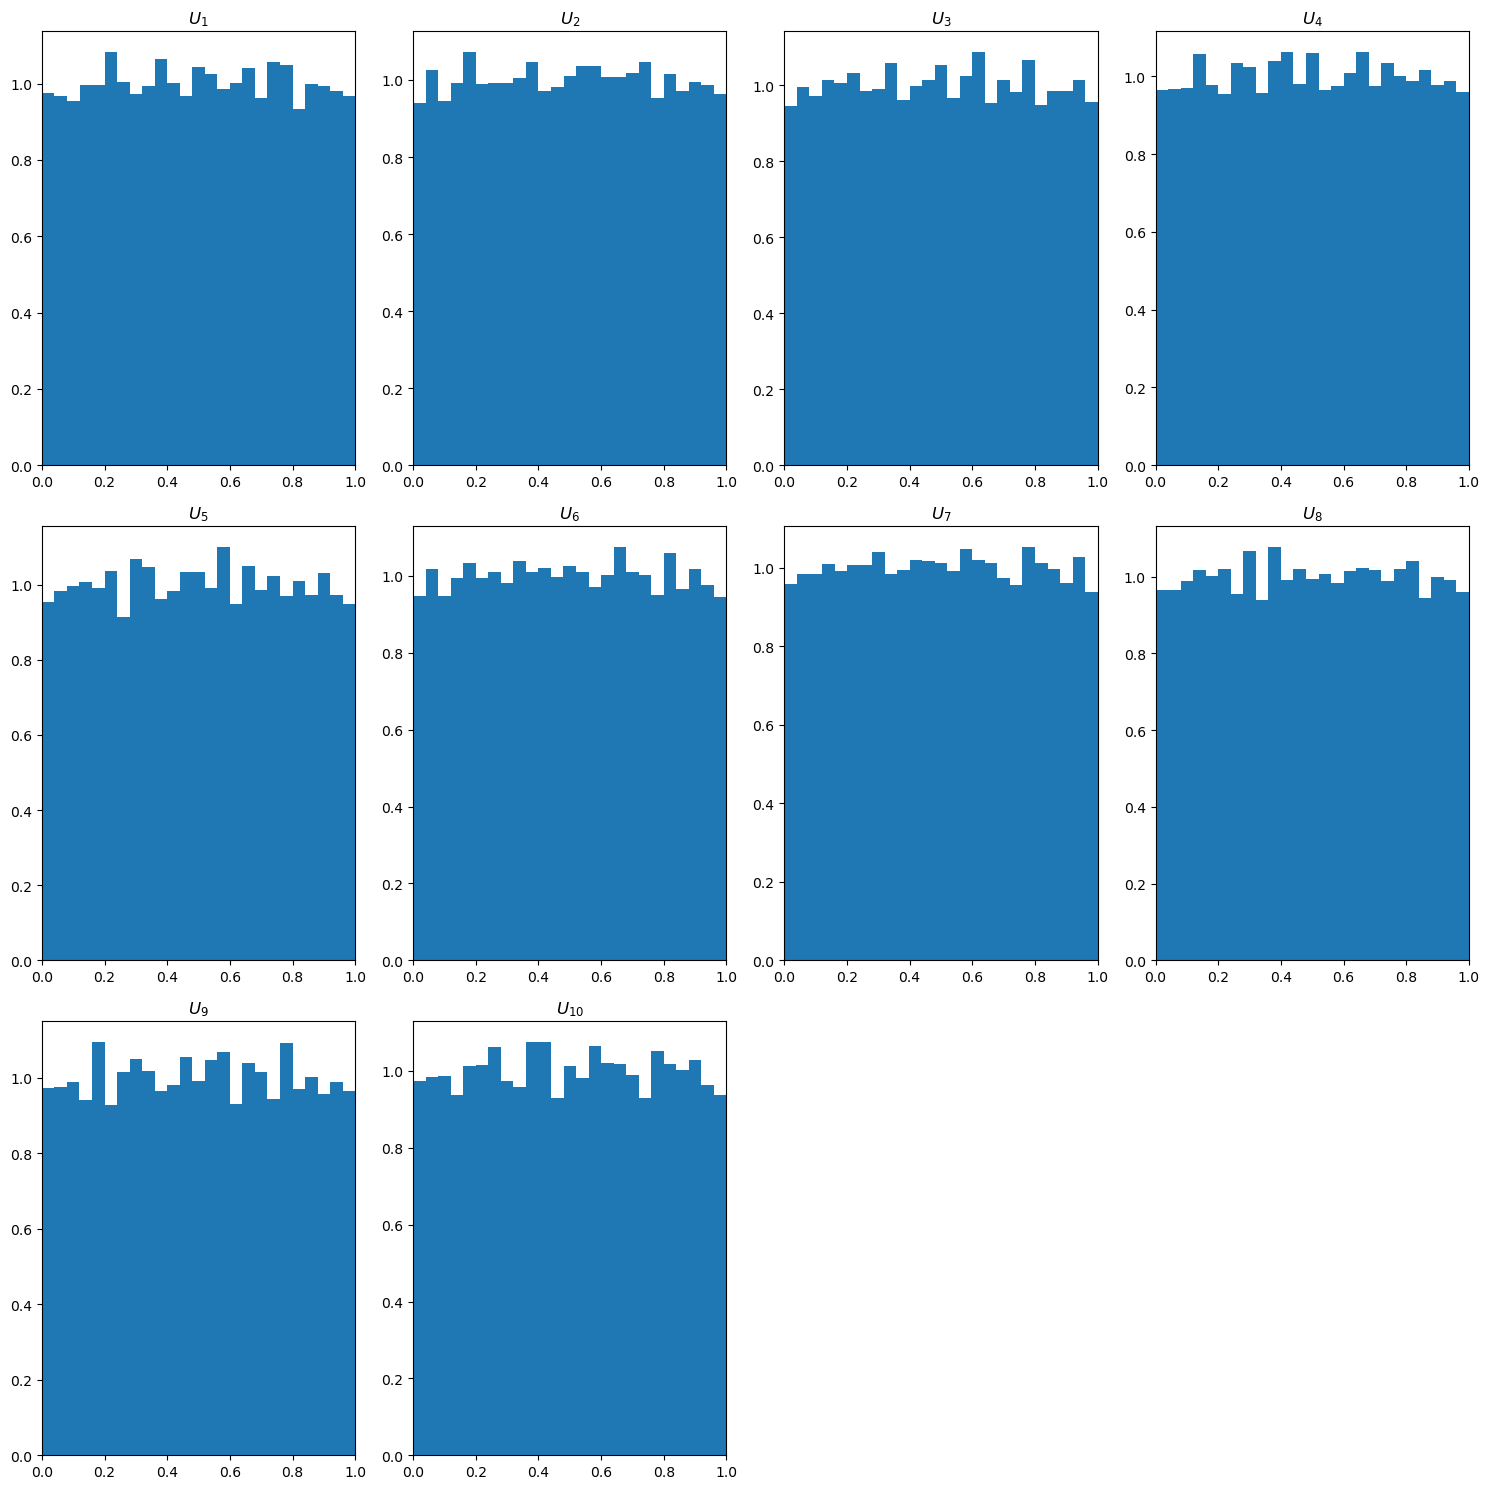

In [6]:
n_cols = int(np.ceil(np.sqrt(N)))
n_rows = int(np.ceil(N / n_cols))
fig, ax = plt.subplots(n_rows,n_cols, figsize=(15,15))

for i in range(N):
    ax.flat[i].hist(U[i,:], density=True, bins = 25)
    ax.flat[i].set_title("$U_{" +f"{i+1}" + "}$")
    ax.flat[i].set_xlim([0,1])

for i in range(N,n_rows*n_cols):
    ax.flat[i].axis("off")

fig.tight_layout()

In [623]:
G = np.zeros((N,N))

count = 0


for i in range(N-1):
    # kernel_i = kernels_U[i]
    # h_i = h[i]
    u_i = U[i,:]
    for j in range(i+1, N):
        print(f"{ count } / { (N*(N-1)/2) :3.0f}    [{100*count/ (N*(N-1)/2) :7.2f}%]    ({i}, {j})\033[K", end ="\r")

        u_j = U[j,:]

        kernel_ij = gaussian_kde(np.vstack([u_i,u_j]))

        d_vol = kernel_ij.integrate_box(
                low_bounds = [0,0],
                high_bounds = [1,1]
            )
        
        # Simple normalization of KDE such that integrates to 1 (no jackknifing)
        G[i,j] = G[j,i] = \
            scipy.integrate.dblquad(
                lambda x,y : 
                    kernel_ij.pdf(np.vstack([x,y])) * \
                    kernel_ij.logpdf(np.vstack([x,y])),
                0,1,
                0,1
            )[0] / d_vol - np.log(d_vol)

        count += 1
        print(f"{ count } / { (N*(N-1)/2) :3.0f}    [{100*count/ (N*(N-1)/2) :7.2f}%]    ({i}, {j})\033[K", end ="\r")
        

In [639]:
G_dir = ND(G, alpha=0.25)

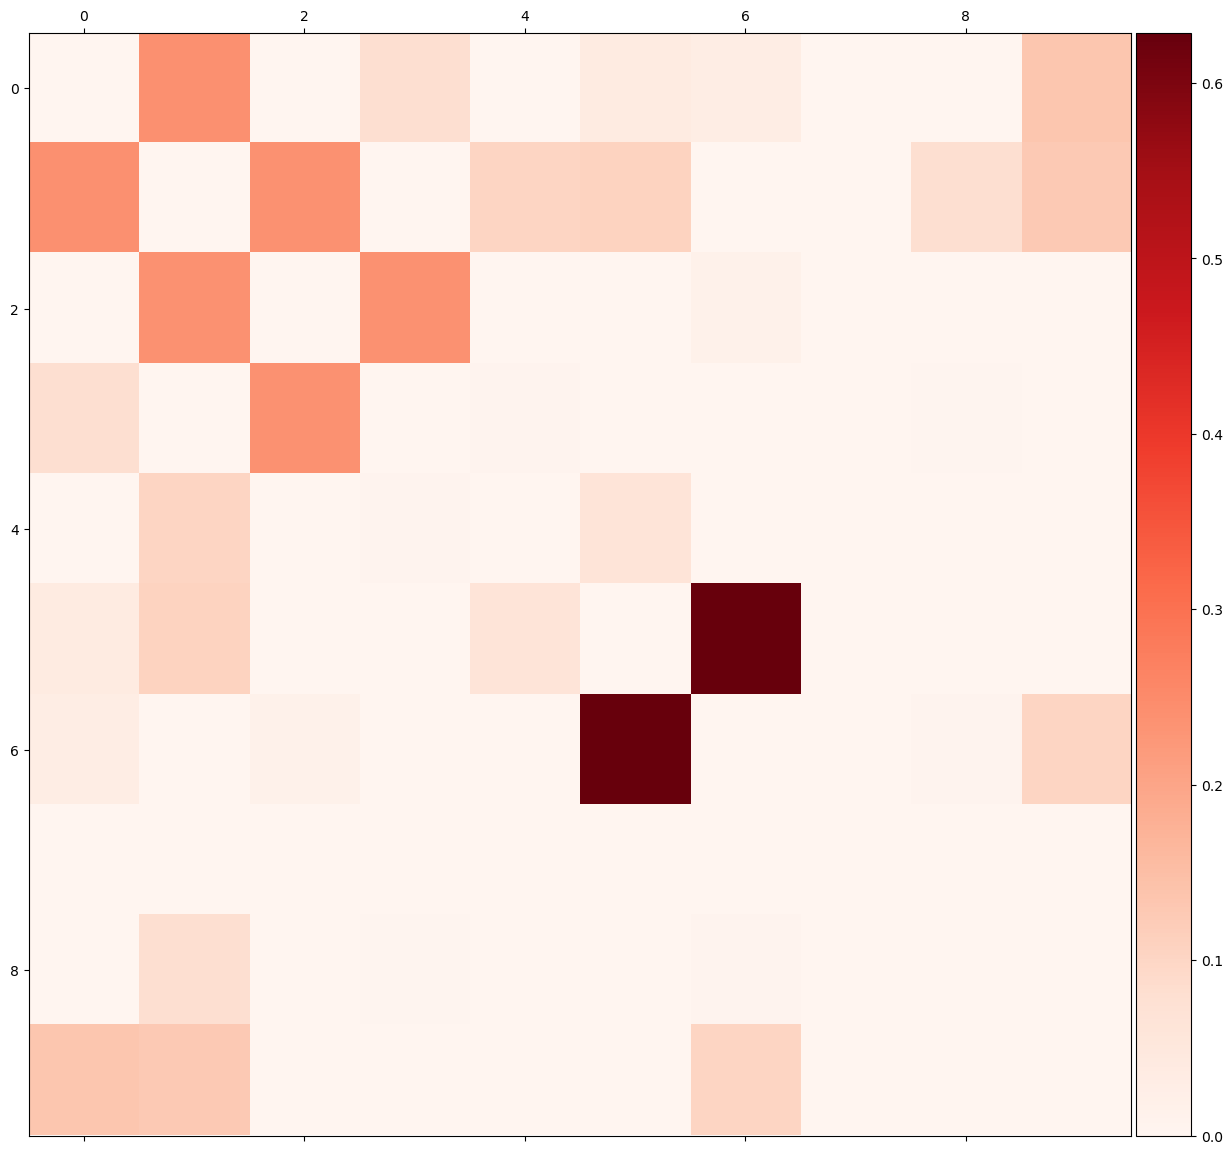

In [640]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
r = ax.matshow(G_dir, cmap = "Reds", vmin=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(r, cax=cax)

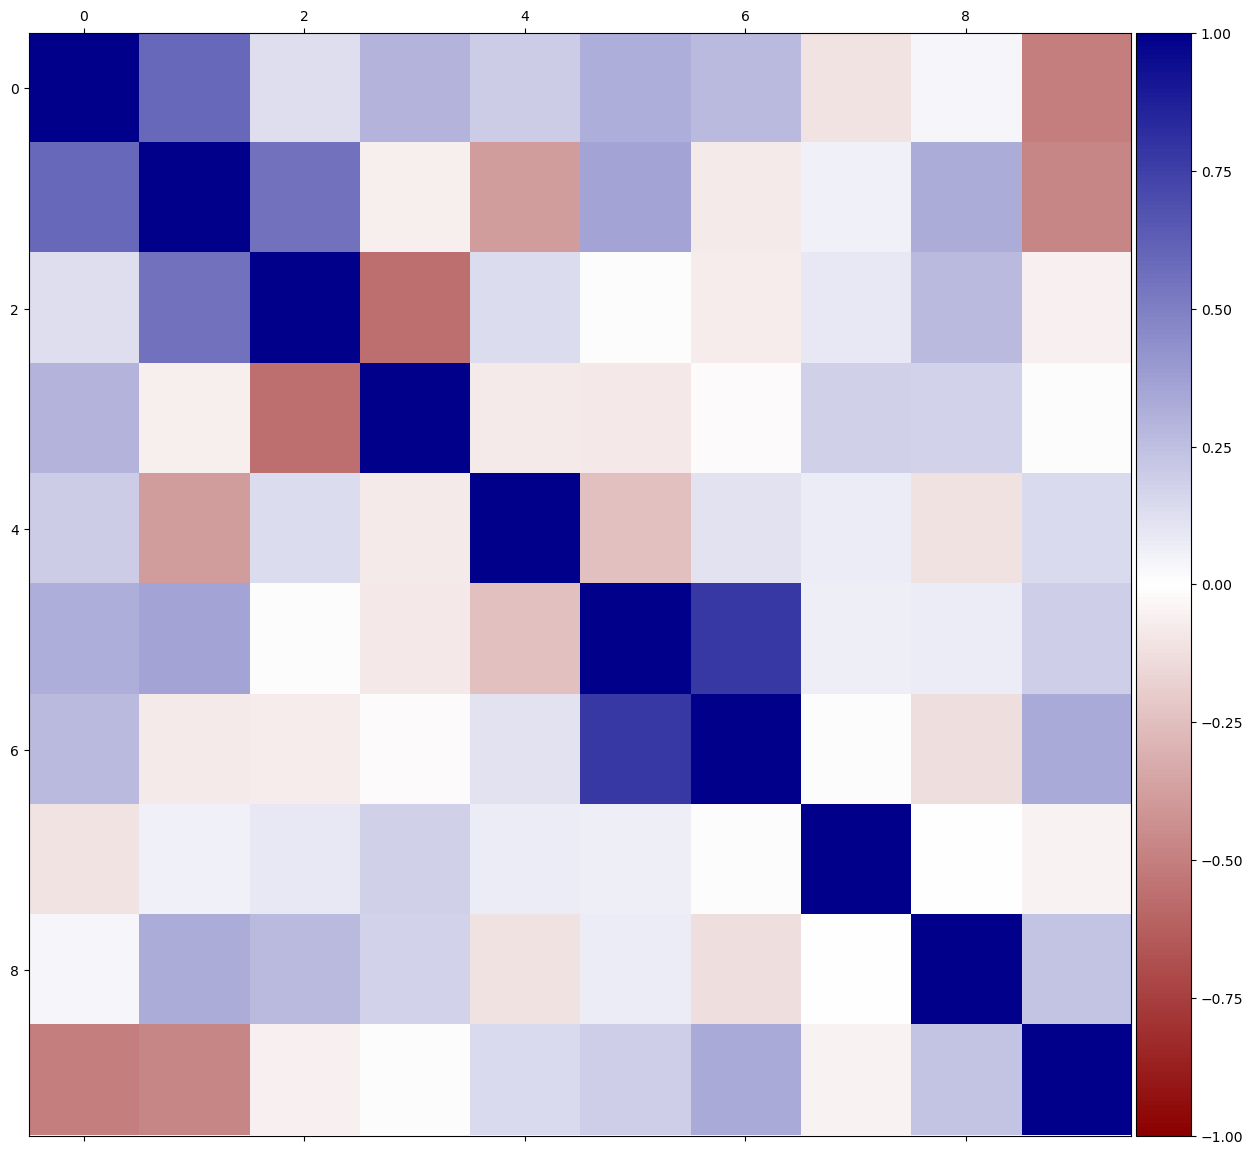

In [8]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
r = ax.matshow(cor, cmap = colormap_corr, vmin=-1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(r, cax=cax)

In [635]:
temp = ND(-np.log(1-(cor-np.identity(10))**2)/2)

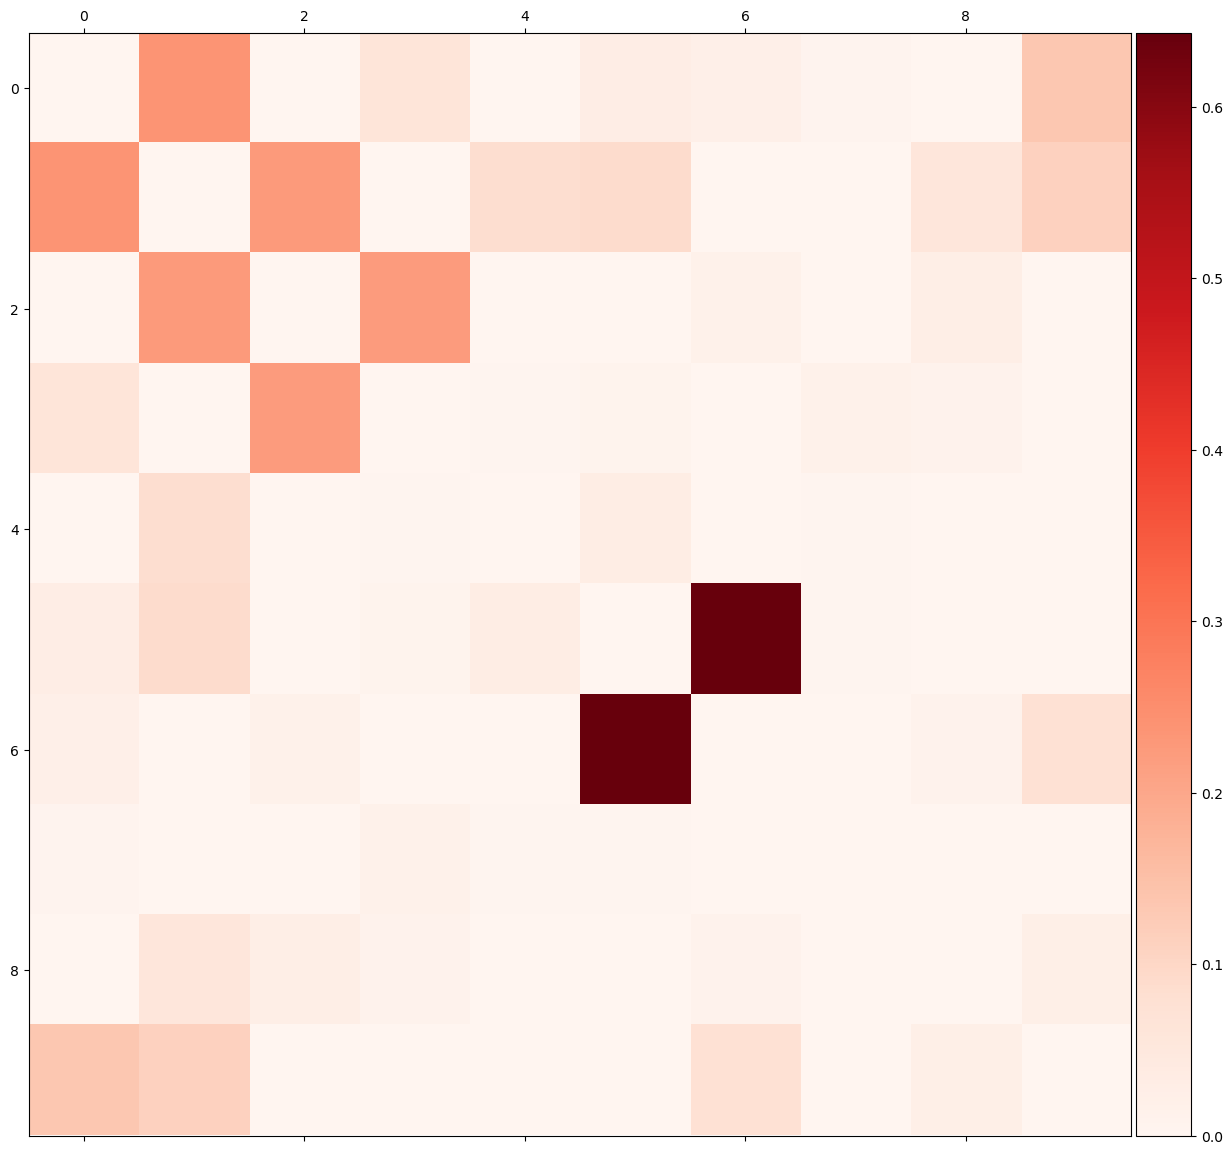

In [636]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
r = ax.matshow(temp, cmap = "Reds", vmin=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(r, cax=cax)

In [634]:
-np.log(1-(cor-np.identity(10))**2)/2

array([[-0.00000000e+00,  2.15567866e-01,  8.55829027e-03,
         4.45927294e-02,  2.01932306e-02,  5.18470021e-02,
         3.88345012e-02,  5.86400642e-03,  5.17293944e-04,
         1.44998922e-01],
       [ 2.15567866e-01, -0.00000000e+00,  1.82365004e-01,
         2.37990277e-03,  7.99292324e-02,  6.62364576e-02,
         3.20994367e-03,  1.52367405e-03,  5.57991806e-02,
         1.24435372e-01],
       [ 8.55829027e-03,  1.82365004e-01, -0.00000000e+00,
         1.90947669e-01,  9.55602880e-03,  9.77820249e-05,
         2.78150639e-03,  4.03228045e-03,  3.71818112e-02,
         1.58503110e-03],
       [ 4.45927294e-02,  2.37990277e-03,  1.90947669e-01,
        -0.00000000e+00,  3.32150604e-03,  3.82464716e-03,
         1.58512800e-04,  1.66537251e-02,  1.54889677e-02,
         1.17884292e-04],
       [ 2.01932306e-02,  7.99292324e-02,  9.55602880e-03,
         3.32150604e-03, -0.00000000e+00,  3.19076022e-02,
         6.62522527e-03,  2.73418203e-03,  6.16830124e-03,
         1.

In [51]:
OBSERVATIONS_TRANSFORMED.columns

Index(['T_delay_10', 'T_delay_9', 'T_delay_8', 'T_delay_7', 'T_delay_6',
       'T_delay_5', 'T_delay_4', 'T_delay_3', 'T_delay_2', 'T_delay_1',
       'T_production_1', 'T_production_2', 'T_production_3.1',
       'T_production_3.2', 'T_production_4.2', 'T_production_5',
       'T_production_6', 'T_production_7', 'T_production_9', 'T_production_10',
       'T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7', 'T_9', 'T_10',
       'T_total', 'M_delay_9', 'M_delay_8', 'M_delay_7', 'M_delay_5',
       'M_delay_3', 'M_production_1', 'M_production_2', 'M_production_3.1',
       'M_production_3.2', 'M_production_4.2', 'M_production_4.3',
       'M_production_5', 'M_production_6', 'M_production_7', 'M_production_8',
       'M_production_9', 'M_production_10', 'M_1', 'M_2', 'M_3', 'M_4', 'M_5',
       'M_6', 'M_7', 'M_8', 'M_9', 'M_10', 'M_total'],
      dtype='object', name='EventFrameID_Reference')

In [ ]:
OBSERVATIONS_TRANSFORMED["T_delay_4"]
OBSERVATIONS_TRANSFORMED["T_production_4.2"]
OBSERVATIONS_TRANSFORMED["T_4"]

In [53]:
OBSERVATIONS_TRANSFORMED.to_pickle("OBSERVATIONS_TRANSFORMED - Cycle data.pkl")